# CA2
### Jessica Fornetti

This assignment focusses on orders placed by US customers on a grocery delivery application. We are acting as a data analyst for the company behind the application, to uncover patterns and trends in the purchases to implement better buisness stratigies.

The first dataset Different Store Sales (https://www.kaggle.com/datasets/kzmontage/sales-from-different-stores) is a fictional time-series dataset of the different customer transactions. We have the following columns : invoice_no, customer_id, gender, age, category, quantity, selling_price_per_unit, cost_price_per_unit, payment_method, region, state, shopping_mall.

The second dataset US Population By State (https://www.kaggle.com/datasets/alexandrepetit881234/us-population-by-state) provides the poulation count of each US state in 2022. The columns are the following: rank, state, state_code, 2020_census, percent_of_total.

## Part 1

First we load the libraries needed:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Then we load the first dataset:

In [4]:
df = pd.read_csv('Different_stores_dataset.csv')
df

invoice_no      invoice_date customer_id  gender  age         category  \
0        I138884   10/30/2016 9:58     C241288  Female   28         Clothing   
1        I317333   10/30/2016 9:58     C111565    Male   21            Shoes   
2        I127801   10/30/2016 9:58     C266599    Male   20         Clothing   
3        I173702   10/30/2016 9:58     C988172  Female   66            Shoes   
4        I337046   10/30/2016 9:59     C189076  Female   53            Books   
...          ...               ...         ...     ...  ...              ...   
99452    I219422  11/15/2016 12:43     C441542  Female   45         Souvenir   
99453    I325143  11/15/2016 12:43     C569580    Male   27  Food & Beverage   
99454    I824010  11/15/2016 12:44     C103292    Male   63  Food & Beverage   
99455    I702964  11/15/2016 12:44     C800631    Male   56       Technology   
99456    I232867  11/15/2016 12:44     C273973  Female   36         Souvenir   

       quantity  selling_price_per_unit  cost_price_per_unit payment_method  \
0             5                 1500.40            1425.3800    Credit Card   
1             3                 1800.51            1620.4590     Debit Card   
2             1                  300.08             295.0600           Cash   
3             5                 3000.85            2900.7650    Credit Card   
4             4                   60.60              45.4500           Cash   
...         ...                     ...                  ...            ...   
99452         5                   58.65              43.9875    Credit Card   
99453         2                   10.46               7.3220           Cash   
99454         2                   10.46               7.3220     Debit Card   
99455         4                 4200.00            3780.0000           Cash   
99456         3                   35.19              24.6330    Credit Card   

      region       state     shopping_mall  
0      South    Kentucky            Kanyon  
1      South    Kentucky    Viaport Outlet  
2       West  California         Metrocity  
3      South     Florida      Metropol AVM  
4      South     Florida            Kanyon  
...      ...         ...               ...  
99452  South     Alabama            Kanyon  
99453  South     Alabama    Viaport Outlet  
99454  South     Alabama         Metrocity  
99455  South     Georgia      Istinye Park  
99456  South     Georgia  Mall of Istanbul  

[99457 rows x 13 columns]

We can rename the columns:

In [5]:
df = df.rename(columns={'invoice_no':'Invoice_Number', 'invoice_date':'Invoice_Date', 'customer_id':'Customer_ID', 'gender':'Gender', 'age':'Age', 'category':'Category', 'quantity':'Quantity', 'selling_price_per_unit':'Selling_Price_Per_Unit', 'cost_price_per_unit':'Cost_Per_Unit', 'payment_method':'Payment_Method', 'region':'Region', 'state':'State', 'shopping_mall':'Shopping_Mall'})

In [6]:
df.head()

Invoice_Number     Invoice_Date Customer_ID  Gender  Age  Category  \
0        I138884  10/30/2016 9:58     C241288  Female   28  Clothing   
1        I317333  10/30/2016 9:58     C111565    Male   21     Shoes   
2        I127801  10/30/2016 9:58     C266599    Male   20  Clothing   
3        I173702  10/30/2016 9:58     C988172  Female   66     Shoes   
4        I337046  10/30/2016 9:59     C189076  Female   53     Books   

   Quantity  Selling_Price_Per_Unit  Cost_Per_Unit Payment_Method Region  \
0         5                 1500.40       1425.380    Credit Card  South   
1         3                 1800.51       1620.459     Debit Card  South   
2         1                  300.08        295.060           Cash   West   
3         5                 3000.85       2900.765    Credit Card  South   
4         4                   60.60         45.450           Cash  South   

        State   Shopping_Mall  
0    Kentucky          Kanyon  
1    Kentucky  Viaport Outlet  
2  California       Metrocity  
3     Florida    Metropol AVM  
4     Florida          Kanyon

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Invoice_Number          99457 non-null  object 
 1   Invoice_Date            99457 non-null  object 
 2   Customer_ID             99457 non-null  object 
 3   Gender                  99457 non-null  object 
 4   Age                     99457 non-null  int64  
 5   Category                99457 non-null  object 
 6   Quantity                99457 non-null  int64  
 7   Selling_Price_Per_Unit  99457 non-null  float64
 8   Cost_Per_Unit           99457 non-null  float64
 9   Payment_Method          99457 non-null  object 
 10  Region                  99457 non-null  object 
 11  State                   99457 non-null  object 
 12  Shopping_Mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


We can notice that certain columns aren't in the right data types. We can change the Invoice Date column to be a timestamp:

In [8]:
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])
df.dtypes

Invoice_Number                    object
Invoice_Date              datetime64[ns]
Customer_ID                       object
Gender                            object
Age                                int64
Category                          object
Quantity                           int64
Selling_Price_Per_Unit           float64
Cost_Per_Unit                    float64
Payment_Method                    object
Region                            object
State                             object
Shopping_Mall                     object
dtype: object

The categorial columns are currently strings, but it would make more sense to convert them to factors. We have the following categories for each of them:

In [9]:
print(df['Gender'].unique())
print(df['Category'].unique())
print(df['Payment_Method'].unique())
print(df['Region'].unique())
print(df['State'].unique())
print(df['Shopping_Mall'].unique())

['Female' 'Male']
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
['Credit Card' 'Debit Card' 'Cash']
['South' 'West' 'Central' 'East']
['Kentucky' 'California' 'Florida' 'Oregon' 'Idaho' 'North Carolina'
 'Washington' 'Texas' 'Iowa' 'Pennsylvania' 'Illinois' 'Michigan'
 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia' 'Tennessee'
 'Alabama' 'Colorado' 'Ohio' 'Massachusetts' 'Georgia']
['Kanyon' 'Viaport Outlet' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Zorlu Center']


In [10]:
categories = ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']
categories_payment_method = ['Credit Card', 'Debit Card', 'Cash']
categories_region = ['South', 'West', 'Central', 'East']
categories_state = ['Kentucky', 'California', 'Florida', 'Oregon', 'Idaho', 'North Carolina', 'Washington', 'Texas', 'Iowa', 'Pennsylvania', 'Illinois', 'Michigan',
'Delaware', 'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee', 'Alabama', 'Colorado', 'Ohio', 'Massachusetts', 'Georgia']
categories_shopping_mall = ['Kanyon', 'Viaport Outlet', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Mall of Istanbul', 'Zorlu Center']

df['Gender'] = pd.Categorical(df['Gender'], categories=['Female', 'Male'], ordered=False)
df['Category'] = pd.Categorical(df['Category'], categories=categories, ordered=False)
df['Payment_Method'] = pd.Categorical(df['Payment_Method'], categories=categories_payment_method, ordered=False)
df['Region'] = pd.Categorical(df['Region'], categories=categories_region, ordered=False)
df['State'] = pd.Categorical(df['State'], categories=categories_state, ordered=False)
df['Shopping_Mall'] = pd.Categorical(df['Shopping_Mall'], categories=categories_shopping_mall, ordered=False)

df.dtypes

Invoice_Number                    object
Invoice_Date              datetime64[ns]
Customer_ID                       object
Gender                          category
Age                                int64
Category                        category
Quantity                           int64
Selling_Price_Per_Unit           float64
Cost_Per_Unit                    float64
Payment_Method                  category
Region                          category
State                           category
Shopping_Mall                   category
dtype: object

Given that we have the cost per unit, price per unit and quantity of each item purchased, we can add a Revenue column: 

In [11]:
df['Revenue'] = df['Selling_Price_Per_Unit'] * df['Quantity'] - df['Cost_Per_Unit']* df['Quantity']
df.head()

Invoice_Number        Invoice_Date Customer_ID  Gender  Age  Category  \
0        I138884 2016-10-30 09:58:00     C241288  Female   28  Clothing   
1        I317333 2016-10-30 09:58:00     C111565    Male   21     Shoes   
2        I127801 2016-10-30 09:58:00     C266599    Male   20  Clothing   
3        I173702 2016-10-30 09:58:00     C988172  Female   66     Shoes   
4        I337046 2016-10-30 09:59:00     C189076  Female   53     Books   

   Quantity  Selling_Price_Per_Unit  Cost_Per_Unit Payment_Method Region  \
0         5                 1500.40       1425.380    Credit Card  South   
1         3                 1800.51       1620.459     Debit Card  South   
2         1                  300.08        295.060           Cash   West   
3         5                 3000.85       2900.765    Credit Card  South   
4         4                   60.60         45.450           Cash  South   

        State   Shopping_Mall  Revenue  
0    Kentucky          Kanyon  375.100  
1    Kentucky  Viaport Outlet  540.153  
2  California       Metrocity    5.020  
3     Florida    Metropol AVM  500.425  
4     Florida          Kanyon   60.600

We can round our float columns to 2 decimals, as a price of an item follows that convention:

In [12]:
df['Revenue'] = round(df['Revenue'], 2)
df['Selling_Price_Per_Unit'] = round(df['Selling_Price_Per_Unit'], 2)
df['Cost_Per_Unit'] = round(df['Cost_Per_Unit'], 2)
df.head()

Invoice_Number        Invoice_Date Customer_ID  Gender  Age  Category  \
0        I138884 2016-10-30 09:58:00     C241288  Female   28  Clothing   
1        I317333 2016-10-30 09:58:00     C111565    Male   21     Shoes   
2        I127801 2016-10-30 09:58:00     C266599    Male   20  Clothing   
3        I173702 2016-10-30 09:58:00     C988172  Female   66     Shoes   
4        I337046 2016-10-30 09:59:00     C189076  Female   53     Books   

   Quantity  Selling_Price_Per_Unit  Cost_Per_Unit Payment_Method Region  \
0         5                 1500.40        1425.38    Credit Card  South   
1         3                 1800.51        1620.46     Debit Card  South   
2         1                  300.08         295.06           Cash   West   
3         5                 3000.85        2900.76    Credit Card  South   
4         4                   60.60          45.45           Cash  South   

        State   Shopping_Mall  Revenue  
0    Kentucky          Kanyon   375.10  
1    Kentucky  Viaport Outlet   540.15  
2  California       Metrocity     5.02  
3     Florida    Metropol AVM   500.43  
4     Florida          Kanyon    60.60

In [13]:
df.shape

(99457, 14)

We have 99457 rows of data and 14 different columns. <br><br>
We have the following descriptive statistics for the quantitative variables:

In [14]:
df.describe()

Invoice_Date           Age      Quantity  \
count                          99457  99457.000000  99457.000000   
mean   2016-11-07 11:20:53.000191232     43.427089      3.004424   
min              2016-10-30 09:58:00     18.000000      1.000000   
25%              2016-11-03 10:39:00     30.000000      2.000000   
50%              2016-11-07 11:21:00     43.000000      3.000000   
75%              2016-11-11 12:02:00     56.000000      4.000000   
max              2016-11-15 12:44:00     69.000000     15.000000   
std                              NaN     14.990054      1.415237   

       Selling_Price_Per_Unit  Cost_Per_Unit       Revenue  
count            99457.000000   99457.000000  99457.000000  
mean               689.256321     605.113160    267.332893  
min                  5.230000       3.660000   -159.940000  
25%                 45.450000      31.820000     40.910000  
50%                203.300000     162.640000    114.690000  
75%               1200.320000    1080.310000    300.080000  
max               5250.000000    4725.000000   7087.500000  
std                941.184567     858.838416    403.074540

We can check for the Nas in our dataset:

In [15]:
df.isna().sum()

Invoice_Number            0
Invoice_Date              0
Customer_ID               0
Gender                    0
Age                       0
Category                  0
Quantity                  0
Selling_Price_Per_Unit    0
Cost_Per_Unit             0
Payment_Method            0
Region                    0
State                     0
Shopping_Mall             0
Revenue                   0
dtype: int64

We can notice there are no Nas. <br><br>
Now we will load our second file, the us population count per state:

In [16]:
us_states_pop = pd.read_csv('us_pop_by_state.csv')
us_states_pop

rank           state state_code  2020_census  percent_of_total
0    1.0      California         CA     39538223            0.1191
1    2.0           Texas         TX     29145505            0.0874
2    3.0         Florida         FL     21538187            0.0647
3    4.0        New York         NY     20201249            0.0586
4    5.0    Pennsylvania         PA     13002700            0.0386
5    6.0        Illinois         IL     12801989            0.0382
6    7.0            Ohio         OH     11799448            0.0352
7    8.0         Georgia         GA     10711908            0.0320
8    9.0  North Carolina         NC     10439388            0.0316
9   10.0        Michigan         MI     10077331            0.0301
10  11.0      New Jersey         NJ      9288994            0.0268
11  12.0        Virginia         VA      8631393            0.0257
12  13.0      Washington         WA      7705281            0.0229
13  14.0         Arizona         AZ      7151502            0.0219
14  15.0   Massachusetts         MA      7029917            0.0209
15  16.0       Tennessee         TN      6910840            0.0206
16  17.0         Indiana         IN      6785528            0.0203
17  18.0        Maryland         MD      6177224            0.0185
18  19.0        Missouri         MO      6154913            0.0182
19  20.0       Wisconsin         WI      5893718            0.0175
20  21.0        Colorado         CO      5773714            0.0174
21  22.0       Minnesota         MN      5706494            0.0170
22  23.0  South Carolina         SC      5118425            0.0155
23  24.0         Alabama         AL      5024279            0.0148
24  25.0       Louisiana         LA      4657757            0.0140
25  26.0        Kentucky         KY      4505836            0.0135
26  27.0          Oregon         OR      4237256            0.0127
27  28.0        Oklahoma         OK      3959353            0.0119
28  29.0     Connecticut         CT      3605944            0.0107
29  30.0            Utah         UT      3205958            0.0097
30  31.0            Iowa         IA      3271616            0.0095
31  32.0          Nevada         NV      3104614            0.0093
32  33.0        Arkansas         AR      3011524            0.0091
33  34.0     Mississippi         MS      2961279            0.0090
34  35.0          Kansas         KS      2937880            0.0088
35  36.0      New Mexico         NM      2117522            0.0063
36  37.0        Nebraska         NE      1961504            0.0058
37  38.0           Idaho         ID      1839106            0.0054
38  39.0   West Virginia         WV      1793716            0.0054
39  40.0          Hawaii         HI      1455271            0.0043
40  41.0   New Hampshire         NH      1377529            0.0041
41  42.0           Maine         ME      1362359            0.0041
42  43.0    Rhode Island         RI      1097379            0.0032
43  44.0         Montana         MT      1084225            0.0032
44  45.0        Delaware         DE       989948            0.0029
45  46.0    South Dakota         SD       886667            0.0027
46  47.0    North Dakota         ND       779094            0.0023
47  48.0          Alaska         AK       733391            0.0022
48  49.0              DC         DC       689545            0.0021
49  50.0         Vermont         VT       643077            0.0019
50  51.0         Wyoming         WY       576851            0.0017
51   NaN      Total U.S.      Total    331449281               NaN

We are mainly interested in the rank, 2020_census and percent_of_total columns, which we would like to add to our dataframe for each state. <br>
First we will rename the columns to make more sense when merging with the other datset:

In [17]:
us_states_pop = us_states_pop.rename(columns={'rank':'State_Rank', 'state':'State', 'state_code':'State_Code', '2020_census':'State_Population_2020', 'percent_of_total':'State_Percent_Of_Total'})
us_states_pop.head()

State_Rank         State State_Code  State_Population_2020  \
0         1.0    California         CA               39538223   
1         2.0         Texas         TX               29145505   
2         3.0       Florida         FL               21538187   
3         4.0      New York         NY               20201249   
4         5.0  Pennsylvania         PA               13002700   

   State_Percent_Of_Total  
0                  0.1191  
1                  0.0874  
2                  0.0647  
3                  0.0586  
4                  0.0386

We can check to see if there are any Nas:

In [18]:
us_states_pop.isna().sum()

State_Rank                1
State                     0
State_Code                0
State_Population_2020     0
State_Percent_Of_Total    1
dtype: int64

In [19]:
us_states_pop.loc[us_states_pop['State_Rank'].isna()]

State_Rank       State State_Code  State_Population_2020  \
51         NaN  Total U.S.      Total              331449281   

    State_Percent_Of_Total  
51                     NaN

The last line of the dataframe contains 2 Nas, as this row only contains the total population count of the US. As this row is not particularly useful for us we can drop it. We are only interessted in having the poulaion count for the states that are in our original dataframe.

In [20]:
us_states_pop = us_states_pop.dropna(subset=['State_Rank'])
us_states_pop

State_Rank           State State_Code  State_Population_2020  \
0          1.0      California         CA               39538223   
1          2.0           Texas         TX               29145505   
2          3.0         Florida         FL               21538187   
3          4.0        New York         NY               20201249   
4          5.0    Pennsylvania         PA               13002700   
5          6.0        Illinois         IL               12801989   
6          7.0            Ohio         OH               11799448   
7          8.0         Georgia         GA               10711908   
8          9.0  North Carolina         NC               10439388   
9         10.0        Michigan         MI               10077331   
10        11.0      New Jersey         NJ                9288994   
11        12.0        Virginia         VA                8631393   
12        13.0      Washington         WA                7705281   
13        14.0         Arizona         AZ                7151502   
14        15.0   Massachusetts         MA                7029917   
15        16.0       Tennessee         TN                6910840   
16        17.0         Indiana         IN                6785528   
17        18.0        Maryland         MD                6177224   
18        19.0        Missouri         MO                6154913   
19        20.0       Wisconsin         WI                5893718   
20        21.0        Colorado         CO                5773714   
21        22.0       Minnesota         MN                5706494   
22        23.0  South Carolina         SC                5118425   
23        24.0         Alabama         AL                5024279   
24        25.0       Louisiana         LA                4657757   
25        26.0        Kentucky         KY                4505836   
26        27.0          Oregon         OR                4237256   
27        28.0        Oklahoma         OK                3959353   
28        29.0     Connecticut         CT                3605944   
29        30.0            Utah         UT                3205958   
30        31.0            Iowa         IA                3271616   
31        32.0          Nevada         NV                3104614   
32        33.0        Arkansas         AR                3011524   
33        34.0     Mississippi         MS                2961279   
34        35.0          Kansas         KS                2937880   
35        36.0      New Mexico         NM                2117522   
36        37.0        Nebraska         NE                1961504   
37        38.0           Idaho         ID                1839106   
38        39.0   West Virginia         WV                1793716   
39        40.0          Hawaii         HI                1455271   
40        41.0   New Hampshire         NH                1377529   
41        42.0           Maine         ME                1362359   
42        43.0    Rhode Island         RI                1097379   
43        44.0         Montana         MT                1084225   
44        45.0        Delaware         DE                 989948   
45        46.0    South Dakota         SD                 886667   
46        47.0    North Dakota         ND                 779094   
47        48.0          Alaska         AK                 733391   
48        49.0              DC         DC                 689545   
49        50.0         Vermont         VT                 643077   
50        51.0         Wyoming         WY                 576851   

    State_Percent_Of_Total  
0                   0.1191  
1                   0.0874  
2                   0.0647  
3                   0.0586  
4                   0.0386  
5                   0.0382  
6                   0.0352  
7                   0.0320  
8                   0.0316  
9                   0.0301  
10                  0.0268  
11                  0.0257  
12                  0.0229  
13                  0.0219  
14                  0.0209  
15 

We can check the data types:

In [21]:
us_states_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Rank              51 non-null     float64
 1   State                   51 non-null     object 
 2   State_Code              51 non-null     object 
 3   State_Population_2020   51 non-null     int64  
 4   State_Percent_Of_Total  51 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


We can change the State_Rank column to be an integer type instead of a float:

In [22]:
us_states_pop['State_Rank'] = us_states_pop['State_Rank'].astype('int64')
us_states_pop.dtypes

State_Rank                  int64
State                      object
State_Code                 object
State_Population_2020       int64
State_Percent_Of_Total    float64
dtype: object

We have the following descriptive statistics:

In [23]:
us_states_pop.describe()

State_Rank  State_Population_2020  State_Percent_Of_Total
count   51.000000           5.100000e+01               51.000000
mean    26.000000           6.499105e+06                0.019398
std     14.866069           7.407704e+06                0.022184
min      1.000000           5.768510e+05                0.001700
25%     13.500000           1.816411e+06                0.005400
50%     26.000000           4.505836e+06                0.013500
75%     38.500000           7.428392e+06                0.022400
max     51.000000           3.953822e+07                0.119100

Now we can merge both dataframes, we want to add the State_Rank, State_Population_2020 and State_Percent_Of_Total columns to the original dataframe:

In [24]:
df = pd.merge(df, us_states_pop, on='State', how='left')
df

Invoice_Number        Invoice_Date Customer_ID  Gender  Age  \
0            I138884 2016-10-30 09:58:00     C241288  Female   28   
1            I317333 2016-10-30 09:58:00     C111565    Male   21   
2            I127801 2016-10-30 09:58:00     C266599    Male   20   
3            I173702 2016-10-30 09:58:00     C988172  Female   66   
4            I337046 2016-10-30 09:59:00     C189076  Female   53   
...              ...                 ...         ...     ...  ...   
99452        I219422 2016-11-15 12:43:00     C441542  Female   45   
99453        I325143 2016-11-15 12:43:00     C569580    Male   27   
99454        I824010 2016-11-15 12:44:00     C103292    Male   63   
99455        I702964 2016-11-15 12:44:00     C800631    Male   56   
99456        I232867 2016-11-15 12:44:00     C273973  Female   36   

              Category  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
0             Clothing         5                 1500.40        1425.38   
1                Shoes         3                 1800.51        1620.46   
2             Clothing         1                  300.08         295.06   
3                Shoes         5                 3000.85        2900.76   
4                Books         4                   60.60          45.45   
...                ...       ...                     ...            ...   
99452         Souvenir         5                   58.65          43.99   
99453  Food & Beverage         2                   10.46           7.32   
99454  Food & Beverage         2                   10.46           7.32   
99455       Technology         4                 4200.00        3780.00   
99456         Souvenir         3                   35.19          24.63   

      Payment_Method Region       State     Shopping_Mall  Revenue  \
0        Credit Card  South    Kentucky            Kanyon   375.10   
1         Debit Card  South    Kentucky    Viaport Outlet   540.15   
2               Cash   West  California         Metrocity     5.02   
3        Credit Card  South     Florida      Metropol AVM   500.43   
4               Cash  South     Florida            Kanyon    60.60   
...              ...    ...         ...               ...      ...   
99452    Credit Card  South     Alabama            Kanyon    73.31   
99453           Cash  South     Alabama    Viaport Outlet     6.28   
99454     Debit Card  South     Alabama         Metrocity     6.28   
99455           Cash  South     Georgia      Istinye Park  1680.00   
99456    Credit Card  South     Georgia  Mall of Istanbul    31.67   

       State_Rank State_Code  State_Population_2020  State_Percent_Of_Total  
0              26         KY                4505836                  0.0135  
1              26         KY                4505836                  0.0135  
2               1         CA               39538223                  0.1191  
3               3         FL               21538187                  0.0647  
4               3         FL               21538187                  0.0647  
...           ...        ...                    ...                     ...  
99452          24         AL                5024279                  0.0148  
99453          24         AL                5024279                  0.0148  
99454          24         AL                5024279                  0.0148  
99455           8         GA               10711908                  0.0320  
99456           8         GA               10711908                  0.0320  

[99457 rows x 18 columns]

We can drop the State Code column as it does not provide much usefull information:

In [25]:
df = df.drop(['State_Code'], axis=1)
df

Invoice_Number        Invoice_Date Customer_ID  Gender  Age  \
0            I138884 2016-10-30 09:58:00     C241288  Female   28   
1            I317333 2016-10-30 09:58:00     C111565    Male   21   
2            I127801 2016-10-30 09:58:00     C266599    Male   20   
3            I173702 2016-10-30 09:58:00     C988172  Female   66   
4            I337046 2016-10-30 09:59:00     C189076  Female   53   
...              ...                 ...         ...     ...  ...   
99452        I219422 2016-11-15 12:43:00     C441542  Female   45   
99453        I325143 2016-11-15 12:43:00     C569580    Male   27   
99454        I824010 2016-11-15 12:44:00     C103292    Male   63   
99455        I702964 2016-11-15 12:44:00     C800631    Male   56   
99456        I232867 2016-11-15 12:44:00     C273973  Female   36   

              Category  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
0             Clothing         5                 1500.40        1425.38   
1                Shoes         3                 1800.51        1620.46   
2             Clothing         1                  300.08         295.06   
3                Shoes         5                 3000.85        2900.76   
4                Books         4                   60.60          45.45   
...                ...       ...                     ...            ...   
99452         Souvenir         5                   58.65          43.99   
99453  Food & Beverage         2                   10.46           7.32   
99454  Food & Beverage         2                   10.46           7.32   
99455       Technology         4                 4200.00        3780.00   
99456         Souvenir         3                   35.19          24.63   

      Payment_Method Region       State     Shopping_Mall  Revenue  \
0        Credit Card  South    Kentucky            Kanyon   375.10   
1         Debit Card  South    Kentucky    Viaport Outlet   540.15   
2               Cash   West  California         Metrocity     5.02   
3        Credit Card  South     Florida      Metropol AVM   500.43   
4               Cash  South     Florida            Kanyon    60.60   
...              ...    ...         ...               ...      ...   
99452    Credit Card  South     Alabama            Kanyon    73.31   
99453           Cash  South     Alabama    Viaport Outlet     6.28   
99454     Debit Card  South     Alabama         Metrocity     6.28   
99455           Cash  South     Georgia      Istinye Park  1680.00   
99456    Credit Card  South     Georgia  Mall of Istanbul    31.67   

       State_Rank  State_Population_2020  State_Percent_Of_Total  
0              26                4505836                  0.0135  
1              26                4505836                  0.0135  
2               1               39538223                  0.1191  
3               3               21538187                  0.0647  
4               3               21538187                  0.0647  
...           ...                    ...                     ...  
99452          24                5024279                  0.0148  
99453          24                5024279                  0.0148  
99454          24                5024279                  0.0148  
99455           8               10711908                  0.0320  
99456           8               10711908                  0.0320  

[99457 rows x 17 columns]

Now we are going to create a extra dataset containing synthetic data. We need to consider the statistical properties of the original data when creating our new rows of data, so we are going to test different methods to see which works best. <br> <br>
First we will concentrate on the quantitative variables. Lets try using the uniform distribution as we have positive values:

In [26]:
np.random.seed(1) #we set the random seed to be able to generate the same results when we run the notebook

def generate_data_quantitative_variable(column):
    minimum = column.min()
    maximum = column.max()
    rows = np.random.uniform(low=minimum, high=maximum, size=100) #we use a unifrom distribution
                                                                  #given the size of our dataset, we don't need to add many extra rows
    
    return rows

quatitative_columns = ['Age', 'Quantity', 'Selling_Price_Per_Unit', 'Cost_Per_Unit']
df2 = pd.DataFrame()
for column in quatitative_columns:
    df2[column] = generate_data_quantitative_variable(df[column])

df2['Revenue'] = df2['Selling_Price_Per_Unit'] * df2['Quantity'] - df2['Cost_Per_Unit']* df2['Quantity']
df2

Age   Quantity  Selling_Price_Per_Unit  Cost_Per_Unit       Revenue
0   39.268122   5.573029             4988.685205    3836.720944   6419.929802
1   54.736549   8.378813             2924.747942    4134.651413 -10137.555453
2   18.005833  13.403189             4807.374715    3253.893025  20821.609306
3   33.418961   6.001777             3370.097206    2692.436751   4067.166689
4   25.484550  13.719492             2050.730759     763.660883  17657.945004
..        ...        ...                     ...            ...           ...
95  30.088376  14.047609              362.972344    3987.717571 -50919.003552
96  64.072356   1.195322             1987.355398    1802.566667    220.882039
97  47.257654   4.281069              422.850464    3543.996037 -13361.840200
98  18.146387   9.634897             5159.879714    2416.932707  26428.011878
99  49.474391  14.286228              957.747634    2557.677395 -22856.962127

[100 rows x 5 columns]

Lets compare the descriptive statistics obtained on this new dataset to the original:

In [27]:
df2.describe()

Age    Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
count  100.000000  100.000000              100.000000     100.000000   
mean    42.779774    7.787747             2914.561566    2412.076484   
std     15.090120    4.449600             1459.215357    1330.398310   
min     18.005833    1.175784                7.338528     109.089543   
25%     28.701542    3.729030             1811.471355    1206.706363   
50%     42.007875    8.726391             3013.630129    2517.458463   
75%     54.808886   11.542500             4219.197862    3547.078852   
max     68.431916   14.962520             5159.879714    4696.261320   

            Revenue  
count    100.000000  
mean    4918.117647  
std    18087.920458  
min   -50919.003552  
25%    -4628.187168  
50%     1697.407588  
75%    19599.534974  
max    55557.097733

In [28]:
df.describe()

Invoice_Date           Age      Quantity  \
count                          99457  99457.000000  99457.000000   
mean   2016-11-07 11:20:53.000191232     43.427089      3.004424   
min              2016-10-30 09:58:00     18.000000      1.000000   
25%              2016-11-03 10:39:00     30.000000      2.000000   
50%              2016-11-07 11:21:00     43.000000      3.000000   
75%              2016-11-11 12:02:00     56.000000      4.000000   
max              2016-11-15 12:44:00     69.000000     15.000000   
std                              NaN     14.990054      1.415237   

       Selling_Price_Per_Unit  Cost_Per_Unit       Revenue    State_Rank  \
count            99457.000000   99457.000000  99457.000000  99457.000000   
mean               689.256321     605.113160    267.332893     10.360749   
min                  5.230000       3.660000   -159.940000      1.000000   
25%                 45.450000      31.820000     40.910000      2.000000   
50%                203.300000     162.640000    114.690000      5.000000   
75%               1200.320000    1080.310000    300.080000     14.000000   
max               5250.000000    4725.000000   7087.500000     45.000000   
std                941.184567     858.838416    403.074540     11.463370   

       State_Population_2020  State_Percent_Of_Total  
count           9.945700e+04            99457.000000  
mean            1.803611e+07                0.053896  
min             9.899480e+05                0.002900  
25%             7.151502e+06                0.021900  
50%             1.300270e+07                0.038600  
75%             2.914550e+07                0.087400  
max             3.953822e+07                0.119100  
std             1.294159e+07                0.039003

We can see that we have problem and the distributions aren't similar, as the uniform distribution assumes that all values have an equal probability of occuring. <br><br>
Instead, we can try using a normal distribution to take into account the mean and the skew:

In [29]:
np.random.seed(1) #we set the random seed to be able to generate the same results when we run the notebook

def generate_data_quantitative_variable(column):
    standard_normal_samples = np.random.normal(size=100)#we randomly generate values following the standard normal distribution
    rows = column.mean() + column.std() * standard_normal_samples#we transform the values to follow a normal distribution of the same mean and standard distribution as the column
    rows = np.clip(rows, column.min(), column.max())#we use np.clip() to make sure we only have values ranging from the min and max of the column
    
    return rows

quatitative_columns = ['Age', 'Quantity', 'Selling_Price_Per_Unit', 'Cost_Per_Unit'] #we use this method for all the quantitative columns
df2 = pd.DataFrame()
for column in quatitative_columns:
    df2[column] = generate_data_quantitative_variable(df[column])

df2['Revenue'] = df2['Selling_Price_Per_Unit'] * df2['Quantity'] - df2['Cost_Per_Unit']* df2['Quantity']#we manually calculate the revenue afterwards
df2['Age'] = round(df2['Age']).astype('int64') #we round up the Age and Quantity columns and cast them into integers
df2['Quantity'] = round(df2['Quantity']).astype('int64')

df2

Age  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit      Revenue
0    68         2              311.955953    2379.287235 -4902.947059
1    34         5             1464.797692       3.660000  6921.983271
2    36         4              160.023127       3.660000   559.070169
3    27         4             2529.157396       3.660000  9709.220240
4    56         1                5.230000     365.413314  -524.017761
..  ...       ...                     ...            ...          ...
95   45         1              409.383906    1287.484534  -878.100629
96   38         4             1082.014528       3.660000  4159.050221
97   44         4             1427.870346    1395.772789   115.526266
98   34         4                5.230000     574.737827 -2364.660843
99   54         4             1240.706176    2417.781861 -5276.309217

[100 rows x 5 columns]

Lets compare the descriptive statistics obtained on this new dataset to the original:

In [30]:
df2.describe()

Age    Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
count  100.000000  100.000000              100.000000     100.000000   
mean    44.350000    3.280000              819.908276     723.608486   
std     12.596596    1.318708              785.962151     721.600832   
min     18.000000    1.000000                5.230000       3.660000   
25%     34.000000    3.000000               43.972434      22.812616   
50%     44.500000    3.000000              696.143949     508.074434   
75%     53.250000    4.000000             1314.619910    1221.798282   
max     69.000000    7.000000             2994.564293    3208.129682   

            Revenue  
count    100.000000  
mean     576.099991  
std     3910.032840  
min   -11908.666709  
25%    -1314.417361  
50%      121.767639  
75%     2555.564773  
max     9709.220240

In [31]:
df.describe()

Invoice_Date           Age      Quantity  \
count                          99457  99457.000000  99457.000000   
mean   2016-11-07 11:20:53.000191232     43.427089      3.004424   
min              2016-10-30 09:58:00     18.000000      1.000000   
25%              2016-11-03 10:39:00     30.000000      2.000000   
50%              2016-11-07 11:21:00     43.000000      3.000000   
75%              2016-11-11 12:02:00     56.000000      4.000000   
max              2016-11-15 12:44:00     69.000000     15.000000   
std                              NaN     14.990054      1.415237   

       Selling_Price_Per_Unit  Cost_Per_Unit       Revenue    State_Rank  \
count            99457.000000   99457.000000  99457.000000  99457.000000   
mean               689.256321     605.113160    267.332893     10.360749   
min                  5.230000       3.660000   -159.940000      1.000000   
25%                 45.450000      31.820000     40.910000      2.000000   
50%                203.300000     162.640000    114.690000      5.000000   
75%               1200.320000    1080.310000    300.080000     14.000000   
max               5250.000000    4725.000000   7087.500000     45.000000   
std                941.184567     858.838416    403.074540     11.463370   

       State_Population_2020  State_Percent_Of_Total  
count           9.945700e+04            99457.000000  
mean            1.803611e+07                0.053896  
min             9.899480e+05                0.002900  
25%             7.151502e+06                0.021900  
50%             1.300270e+07                0.038600  
75%             2.914550e+07                0.087400  
max             3.953822e+07                0.119100  
std             1.294159e+07                0.039003

We can see that for Age and Quantity this method works quite well and we obtain values following a similar distribution. However for Selling Price Per Uit and Cost Per Unit, we have a problem as those columns are related by a coefficient as the selling price is usually higher than the cost to ensure profits. <br>We can calculate that coeffcent and apply it to the new Cost Per Unit column to get the Selling Price Per Unit column:

In [32]:
coef = df['Selling_Price_Per_Unit']/df['Cost_Per_Unit']
coef

0        1.052632
1        1.111110
2        1.017013
3        1.034505
4        1.333333
           ...   
99452    1.333258
99453    1.428962
99454    1.428962
99455    1.111111
99456    1.428745
Length: 99457, dtype: float64

We can take the mean coefficient:

In [33]:
coef.mean()

1.2800171676216932

We calculate the new Selling Price Per Unit column and the Revenue column:

In [34]:
df2['Selling_Price_Per_Unit'] = df2['Cost_Per_Unit'] * 1.25 #we use a slightly smaller coef as the values in the Cost per Unit
                                                # column are already quite high and more skewed than the original distribution 
df2['Revenue'] = df2['Selling_Price_Per_Unit'] * df2['Quantity'] - df2['Cost_Per_Unit']* df2['Quantity']
df2.head()

Age  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit      Revenue
0   68         2             2974.109043    2379.287235  1189.643617
1   34         5                4.575000       3.660000     4.575000
2   36         4                4.575000       3.660000     3.660000
3   27         4                4.575000       3.660000     3.660000
4   56         1              456.766643     365.413314    91.353329

Now we can compare the descriptive statistics obtained on the new dataset to the original:

In [35]:
df2.describe()

Age    Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
count  100.000000  100.000000              100.000000     100.000000   
mean    44.350000    3.280000              904.510607     723.608486   
std     12.596596    1.318708              902.001040     721.600832   
min     18.000000    1.000000                4.575000       3.660000   
25%     34.000000    3.000000               28.515770      22.812616   
50%     44.500000    3.000000              635.093043     508.074434   
75%     53.250000    4.000000             1527.247853    1221.798282   
max     69.000000    7.000000             4010.162102    3208.129682   

           Revenue  
count   100.000000  
mean    589.324242  
std     704.575711  
min       0.915000  
25%       6.545428  
50%     337.589367  
75%     859.634518  
max    3208.129682

In [36]:
df.describe()

Invoice_Date           Age      Quantity  \
count                          99457  99457.000000  99457.000000   
mean   2016-11-07 11:20:53.000191232     43.427089      3.004424   
min              2016-10-30 09:58:00     18.000000      1.000000   
25%              2016-11-03 10:39:00     30.000000      2.000000   
50%              2016-11-07 11:21:00     43.000000      3.000000   
75%              2016-11-11 12:02:00     56.000000      4.000000   
max              2016-11-15 12:44:00     69.000000     15.000000   
std                              NaN     14.990054      1.415237   

       Selling_Price_Per_Unit  Cost_Per_Unit       Revenue    State_Rank  \
count            99457.000000   99457.000000  99457.000000  99457.000000   
mean               689.256321     605.113160    267.332893     10.360749   
min                  5.230000       3.660000   -159.940000      1.000000   
25%                 45.450000      31.820000     40.910000      2.000000   
50%                203.300000     162.640000    114.690000      5.000000   
75%               1200.320000    1080.310000    300.080000     14.000000   
max               5250.000000    4725.000000   7087.500000     45.000000   
std                941.184567     858.838416    403.074540     11.463370   

       State_Population_2020  State_Percent_Of_Total  
count           9.945700e+04            99457.000000  
mean            1.803611e+07                0.053896  
min             9.899480e+05                0.002900  
25%             7.151502e+06                0.021900  
50%             1.300270e+07                0.038600  
75%             2.914550e+07                0.087400  
max             3.953822e+07                0.119100  
std             1.294159e+07                0.039003

Given that the datset is large enough, we can consider that our distributions for Selling Price Per Unit, Cost Per Unit and Revenue are similar enough to the original and the effect on the distribution will be negligible. <br><br>
We can round our float columns to 2 decimals:

In [37]:
df2['Revenue'] = round(df2['Revenue'], 2)
df2['Selling_Price_Per_Unit'] = round(df2['Selling_Price_Per_Unit'], 2)
df2['Cost_Per_Unit'] = round(df2['Cost_Per_Unit'], 2)
df2.head()

Age  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  Revenue
0   68         2                 2974.11        2379.29  1189.64
1   34         5                    4.58           3.66     4.57
2   36         4                    4.58           3.66     3.66
3   27         4                    4.58           3.66     3.66
4   56         1                  456.77         365.41    91.35

Now we need to generate the data for the categorical columns in a similar way:

In [38]:
np.random.seed(1) #we set the random seed to be able to generate the same results when we run the notebook

def generate_data_categorical_variable(column):
    categories = column.unique()#we get the unique categories for each column
    probabilities = column.value_counts(normalize=True).sort_index().values#we calculate the probability of each catgory based on how many times each category appears in the column
    rows = np.random.choice(categories, 100, p=probabilities)#we randomly take 100 categories based on the probablities calculated
    return rows

categorical_columns = ['Category', 'Payment_Method', 'Region', 'State', 'Shopping_Mall', 'Gender']
for column in categorical_columns:
    df2[column] = generate_data_categorical_variable(df[column])
df2

Age  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  Revenue  \
0    68         2                 2974.11        2379.29  1189.64   
1    34         5                    4.58           3.66     4.57   
2    36         4                    4.58           3.66     3.66   
3    27         4                    4.58           3.66     3.66   
4    56         1                  456.77         365.41    91.35   
..  ...       ...                     ...            ...      ...   
95   45         1                 1609.36        1287.48   321.87   
96   38         4                    4.58           3.66     3.66   
97   44         4                 1744.72        1395.77  1395.77   
98   34         4                  718.42         574.74   574.74   
99   54         4                 3022.23        2417.78  2417.78   

           Category Payment_Method   Region     State     Shopping_Mall  \
0             Shoes    Credit Card     East  Colorado      Zorlu Center   
1   Food & Beverage     Debit Card  Central      Ohio  Mall of Istanbul   
2          Clothing           Cash     East  Virginia            Kanyon   
3          Clothing     Debit Card  Central  New York  Mall of Istanbul   
4          Clothing           Cash     West   Florida      Metropol AVM   
..              ...            ...      ...       ...               ...   
95         Clothing           Cash    South      Ohio      Zorlu Center   
96       Technology    Credit Card     West      Iowa      Zorlu Center   
97        Cosmetics    Credit Card    South   Alabama  Mall of Istanbul   
98         Clothing           Cash     East  Delaware      Zorlu Center   
99        Cosmetics           Cash     West   Indiana    Viaport Outlet   

    Gender  
0   Female  
1   Female  
2   Female  
3   Female  
4     Male  
..     ...  
95  Female  
96  Female  
97  Female  
98  Female  
99  Female  

[100 rows x 11 columns]

We perform the Chi Square Test to ensure that the distributions are not statistically different:

In [39]:
from scipy.stats import chisquare

categorical_columns = ['Category', 'Payment_Method', 'Region', 'Shopping_Mall', 'Gender']
for column in categorical_columns: #for each categorical column
    observed_original = df[column].value_counts().sort_index().values#we get the value counts from the original dataframe
    observed_synthetic = df2[column].value_counts().sort_index().values#we get the value counts from the synthetic dataframe

    expected_synthetic = len(df2) * (observed_original / observed_original.sum())#we calculate the expected frequencies for the synthetic data
                                                                #based on the proportions of the observed frequencies in the original column

    chi2, p_value = chisquare(observed_synthetic, f_exp=expected_synthetic)#we perform the chi squared test and get the p-value

    print("Column:", column)
    print("p-value:", p_value)

    if p_value < 0.05: #we want a p-value higher than 0.05, so that our distributions are the same/don't differ significantly
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

Column: Category
p-value: 5.073606657992724e-22
The distributions are significantly different.
Column: Payment_Method
p-value: 1.1820409634219056e-11
The distributions are significantly different.
Column: Region
p-value: 0.0021189750070366867
The distributions are significantly different.
Column: Shopping_Mall
p-value: 1.608064398478198e-06
The distributions are significantly different.
Column: Gender
p-value: 0.5148527602812599
The distributions are not significantly different.


We clearly have a problem, as the distributions do differ. We can try a different approach instead:

In [40]:
np.random.seed(1) #we set the random seed to be able to generate the same results when we run the notebook

def generate_data_categorical_variable(column):
    rows = column.sample(n=100, replace=True).values#here we use the sample method for a series to randomly select 100
    return rows                                     #existing values from our column

categorical_columns = ['Category', 'Payment_Method', 'Region', 'State', 'Shopping_Mall', 'Gender']
for column in categorical_columns:
    df2[column] = generate_data_categorical_variable(df[column])
df2

Age  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  Revenue  \
0    68         2                 2974.11        2379.29  1189.64   
1    34         5                    4.58           3.66     4.57   
2    36         4                    4.58           3.66     3.66   
3    27         4                    4.58           3.66     3.66   
4    56         1                  456.77         365.41    91.35   
..  ...       ...                     ...            ...      ...   
95   45         1                 1609.36        1287.48   321.87   
96   38         4                    4.58           3.66     3.66   
97   44         4                 1744.72        1395.77  1395.77   
98   34         4                  718.42         574.74   574.74   
99   54         4                 3022.23        2417.78  2417.78   

           Category Payment_Method   Region           State Shopping_Mall  \
0          Clothing           Cash  Central       Tennessee  Istinye Park   
1          Clothing           Cash  Central   Massachusetts  Metropol AVM   
2   Food & Beverage           Cash     East        New York     Metrocity   
3          Clothing     Debit Card     East         Georgia  Zorlu Center   
4         Cosmetics           Cash     West      California     Metrocity   
..              ...            ...      ...             ...           ...   
95         Clothing     Debit Card    South  North Carolina     Metrocity   
96         Clothing           Cash     West  North Carolina  Istinye Park   
97         Clothing    Credit Card  Central        Colorado  Istinye Park   
98         Clothing           Cash     West        New York  Zorlu Center   
99         Clothing    Credit Card     East    Pennsylvania  Istinye Park   

    Gender  
0   Female  
1   Female  
2   Female  
3   Female  
4   Female  
..     ...  
95    Male  
96  Female  
97  Female  
98  Female  
99  Female  

[100 rows x 11 columns]

We perform the Chi Square Test to ensure that the distributions are not statistically different:

In [41]:
categorical_columns = ['Category', 'Payment_Method', 'Region', 'Shopping_Mall', 'Gender', 'State']
for column in categorical_columns: #for each categorical column
    observed_original = df[column].value_counts().sort_index().values#we get the value counts from the original dataframe
    observed_synthetic = df2[column].value_counts().sort_index().values#we get the value counts from the synthetic dataframe

    expected_synthetic = len(df2) * (observed_original / observed_original.sum())#we calculate the expected frequencies for the synthetic data
                                                                #based on the proportions of the observed frequencies in the original column

    chi2, p_value = chisquare(observed_synthetic, f_exp=expected_synthetic)#we perform the chi squared test and get the p-value

    print("Column:", column)
    print("p-value:", p_value)

    if p_value < 0.05: #we want a p-value higher than 0.05, so that our distributions are the same/don't differ significantly
        print("The distributions are significantly different.")
    else:
        print("The distributions are not significantly different.")

Column: Category
p-value: 0.36220215516518245
The distributions are not significantly different.
Column: Payment_Method
p-value: 0.25792453559306
The distributions are not significantly different.
Column: Region
p-value: 0.08052241359890414
The distributions are not significantly different.
Column: Shopping_Mall
p-value: 0.25496707552915276
The distributions are not significantly different.
Column: Gender
p-value: 0.7124947099308407
The distributions are not significantly different.
Column: State
p-value: 0.10596598357910267
The distributions are not significantly different.


Using this method, we get the desired result.

Now we need to generate the data for the Invoice Number and Customer ID columns. We can notice that each value is unique and there are no repeating customers or transactions as the length for unique values in those columns is equal to the length of the original dataset.

In [42]:
len(df['Invoice_Number'].unique())

99457

In [43]:
len(df['Customer_ID'].unique())

99457

In [44]:
df.shape

(99457, 17)

So we need to generate new numbers with no repitions. First we need to extract the existing numbers:

In [45]:
customer_ids = df['Customer_ID'].str[1:]
customer_ids = customer_ids.sort_values()
customer_ids

42195    100004
80560    100005
13070    100006
53587    100012
4073     100019
          ...  
17665    999886
66659    999910
44092    999974
43414    999976
77866    999995
Name: Customer_ID, Length: 99457, dtype: object

In [46]:
invoice_num = df['Invoice_Number'].str[1:]
invoice_num = invoice_num.sort_values()
invoice_num

98685    100008
19495    100014
6948     100015
94696    100024
36977    100027
          ...  
39275    999956
37020    999959
21067    999972
46474    999973
62967    999994
Name: Invoice_Number, Length: 99457, dtype: object

Then we randomly pick numbers within the existing range that don't exist in the original dataset:

In [47]:
np.random.seed(1)
total_range = set(range(100000, 999999))#the values range from 100004 to 999995 but we round up the interval
unused_integers = list(total_range - set(customer_ids))#we get the unused integers
new_customer_ids = random_integers = np.random.choice(unused_integers, size=100, replace=False)#we randomly select 100 integers
                                          #from the unused ones, we make sure there are no repitions by puting replace at False
new_customer_ids

array([605903, 403914, 461183, 850670, 827957, 682737, 467618, 744590,
       642183, 363380, 980479, 670948, 262422, 153344, 727947, 156006,
       363700, 126951, 104317, 293707, 491727, 980964, 145530, 849549,
       376117, 570435, 540319, 896851, 200198, 468378, 610763, 365348,
       302666, 533007, 672687, 586687, 384034, 188536, 848744, 463073,
       428951, 814818, 584670, 534655, 833433, 970884, 795199, 216563,
       960981, 254822, 599175, 876671, 775542, 183214, 711961, 430863,
       721502, 961185, 862500, 683388, 116575, 277124, 191665, 186503,
       211408, 722004, 636060, 669327, 262439, 165038, 250224, 426127,
       772815, 779375, 903357, 945287, 126057, 303683, 183630, 999260,
       881522, 867356, 267284, 163787, 689455, 945641, 876515, 330309,
       292062, 954614, 495478, 289976, 352767, 686329, 721534, 116834,
       101881, 651037, 623629, 386411])

In [48]:
np.random.seed(2)
total_range = set(range(100000, 999999))
unused_integers = list(total_range - set(invoice_num))
new_invoice_num = random_integers = np.random.choice(unused_integers, size=100, replace=False)
new_invoice_num

array([878794, 814990, 352108, 560002, 508721, 269875, 220757, 570280,
       802752, 172325, 867571, 791410, 224687, 325360, 272492, 907085,
       816501, 511805, 808658, 787543, 904043, 422005, 557318, 836112,
       264922, 239890, 966337, 708756, 949609, 387684, 358848, 112082,
       212680, 159328, 343425, 129213, 576386, 479305, 951961, 551724,
       601174, 431052, 406815, 719989, 516124, 502993, 725523, 469947,
       275890, 462971, 902609, 824052, 469096, 312491, 245183, 691972,
       359340, 805503, 794875, 211551, 405051, 789337, 985732, 568465,
       194240, 934632, 192697, 162911, 291471, 920843, 253365, 163263,
       644547, 329718, 154172, 266723, 792319, 932331, 552074, 833275,
       537357, 940165, 379099, 969307, 366152, 427380, 669960, 848794,
       435547, 941626, 901492, 287841, 956771, 997731, 574001, 594475,
       953712, 866479, 300880, 997391])

We can now create the Customer ID and Invoice Number columns:

In [49]:
df2['Customer_ID'] = new_customer_ids
df2['Invoice_Number'] = new_invoice_num
df2['Customer_ID'] = 'C' + df2['Customer_ID'].astype(str)
df2['Invoice_Number'] = 'I' + df2['Invoice_Number'].astype(str)
df2

Age  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  Revenue  \
0    68         2                 2974.11        2379.29  1189.64   
1    34         5                    4.58           3.66     4.57   
2    36         4                    4.58           3.66     3.66   
3    27         4                    4.58           3.66     3.66   
4    56         1                  456.77         365.41    91.35   
..  ...       ...                     ...            ...      ...   
95   45         1                 1609.36        1287.48   321.87   
96   38         4                    4.58           3.66     3.66   
97   44         4                 1744.72        1395.77  1395.77   
98   34         4                  718.42         574.74   574.74   
99   54         4                 3022.23        2417.78  2417.78   

           Category Payment_Method   Region           State Shopping_Mall  \
0          Clothing           Cash  Central       Tennessee  Istinye Park   
1          Clothing           Cash  Central   Massachusetts  Metropol AVM   
2   Food & Beverage           Cash     East        New York     Metrocity   
3          Clothing     Debit Card     East         Georgia  Zorlu Center   
4         Cosmetics           Cash     West      California     Metrocity   
..              ...            ...      ...             ...           ...   
95         Clothing     Debit Card    South  North Carolina     Metrocity   
96         Clothing           Cash     West  North Carolina  Istinye Park   
97         Clothing    Credit Card  Central        Colorado  Istinye Park   
98         Clothing           Cash     West        New York  Zorlu Center   
99         Clothing    Credit Card     East    Pennsylvania  Istinye Park   

    Gender Customer_ID Invoice_Number  
0   Female     C605903        I878794  
1   Female     C403914        I814990  
2   Female     C461183        I352108  
3   Female     C850670        I560002  
4   Female     C827957        I508721  
..     ...         ...            ...  
95    Male     C116834        I594475  
96  Female     C101881        I953712  
97  Female     C651037        I866479  
98  Female     C623629        I300880  
99  Female     C386411        I997391  

[100 rows x 13 columns]

Now we need to add the final column to the dataset, the timestamp colum. We can first check if there are any repeating timestamps:

In [50]:
len(df['Invoice_Date'].unique())

23207

In [51]:
df['Invoice_Date'].unique()

<DatetimeArray>
['2016-10-30 09:58:00', '2016-10-30 09:59:00', '2016-10-30 10:00:00',
 '2016-10-30 10:01:00', '2016-10-30 10:02:00', '2016-10-30 10:03:00',
 '2016-10-30 10:04:00', '2016-10-30 10:05:00', '2016-10-30 10:06:00',
 '2016-10-30 10:07:00',
 ...
 '2016-11-15 12:35:00', '2016-11-15 12:36:00', '2016-11-15 12:37:00',
 '2016-11-15 12:38:00', '2016-11-15 12:39:00', '2016-11-15 12:40:00',
 '2016-11-15 12:41:00', '2016-11-15 12:42:00', '2016-11-15 12:43:00',
 '2016-11-15 12:44:00']
Length: 23207, dtype: datetime64[ns]

We can see that there are 23207 unique timestamps for 99457 rows of data. We can check how many times each timestamp is repeated on average:

In [52]:
df['Invoice_Date'].value_counts().sort_index()#we can get the counts for each timestamp in order

Invoice_Date
2016-10-30 09:58:00    4
2016-10-30 09:59:00    4
2016-10-30 10:00:00    5
2016-10-30 10:01:00    4
2016-10-30 10:02:00    4
                      ..
2016-11-15 12:40:00    4
2016-11-15 12:41:00    4
2016-11-15 12:42:00    5
2016-11-15 12:43:00    4
2016-11-15 12:44:00    3
Name: count, Length: 23207, dtype: int64

In [53]:
df['Invoice_Date'].value_counts().describe()

count    23207.000000
mean         4.285647
std          0.451827
min          3.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: count, dtype: float64

We can see that most timestamps have 4 transactions, so for our new timestamps we will pick from the existing timestamps with 3 or 4 transactions.

In [54]:
possible_timestamps = df.groupby('Invoice_Date').filter(lambda x: 3 <= x['Invoice_Date'].count() <= 4)['Invoice_Date']
possible_timestamps

0       2016-10-30 09:58:00
1       2016-10-30 09:58:00
2       2016-10-30 09:58:00
3       2016-10-30 09:58:00
4       2016-10-30 09:59:00
                ...        
99452   2016-11-15 12:43:00
99453   2016-11-15 12:43:00
99454   2016-11-15 12:44:00
99455   2016-11-15 12:44:00
99456   2016-11-15 12:44:00
Name: Invoice_Date, Length: 66307, dtype: datetime64[ns]

Here we have isolated the desired timestamps and now we can randomly pick 100 of these timestamps:

In [55]:
new_timestamps = possible_timestamps.sample(n=100, random_state=1)
new_timestamps.sort_index()#we can sort by index to see better

366     2016-10-30 11:23:00
771     2016-10-30 12:58:00
4175    2016-10-31 02:12:00
4431    2016-10-31 03:12:00
4565    2016-10-31 03:43:00
                ...        
94693   2016-11-14 18:13:00
94849   2016-11-14 18:49:00
94935   2016-11-14 19:09:00
96216   2016-11-15 00:08:00
97907   2016-11-15 06:43:00
Name: Invoice_Date, Length: 100, dtype: datetime64[ns]

Now that we have generated our timestamps, we can create our Invoice Date column:

In [56]:
df2['Invoice_Date']=new_timestamps.values
df2

Age  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  Revenue  \
0    68         2                 2974.11        2379.29  1189.64   
1    34         5                    4.58           3.66     4.57   
2    36         4                    4.58           3.66     3.66   
3    27         4                    4.58           3.66     3.66   
4    56         1                  456.77         365.41    91.35   
..  ...       ...                     ...            ...      ...   
95   45         1                 1609.36        1287.48   321.87   
96   38         4                    4.58           3.66     3.66   
97   44         4                 1744.72        1395.77  1395.77   
98   34         4                  718.42         574.74   574.74   
99   54         4                 3022.23        2417.78  2417.78   

           Category Payment_Method   Region           State Shopping_Mall  \
0          Clothing           Cash  Central       Tennessee  Istinye Park   
1          Clothing           Cash  Central   Massachusetts  Metropol AVM   
2   Food & Beverage           Cash     East        New York     Metrocity   
3          Clothing     Debit Card     East         Georgia  Zorlu Center   
4         Cosmetics           Cash     West      California     Metrocity   
..              ...            ...      ...             ...           ...   
95         Clothing     Debit Card    South  North Carolina     Metrocity   
96         Clothing           Cash     West  North Carolina  Istinye Park   
97         Clothing    Credit Card  Central        Colorado  Istinye Park   
98         Clothing           Cash     West        New York  Zorlu Center   
99         Clothing    Credit Card     East    Pennsylvania  Istinye Park   

    Gender Customer_ID Invoice_Number        Invoice_Date  
0   Female     C605903        I878794 2016-11-01 23:30:00  
1   Female     C403914        I814990 2016-11-07 20:33:00  
2   Female     C461183        I352108 2016-11-14 18:49:00  
3   Female     C850670        I560002 2016-11-11 22:17:00  
4   Female     C827957        I508721 2016-11-04 04:11:00  
..     ...         ...            ...                 ...  
95    Male     C116834        I594475 2016-11-13 10:55:00  
96  Female     C101881        I953712 2016-11-04 05:25:00  
97  Female     C651037        I866479 2016-11-09 07:21:00  
98  Female     C623629        I300880 2016-11-10 08:40:00  
99  Female     C386411        I997391 2016-11-01 20:28:00  

[100 rows x 14 columns]

We can make sure that all our data types are coherent and how they are supposed to be:

In [57]:
df2.dtypes

Age                                int64
Quantity                           int64
Selling_Price_Per_Unit           float64
Cost_Per_Unit                    float64
Revenue                          float64
Category                        category
Payment_Method                  category
Region                          category
State                             object
Shopping_Mall                   category
Gender                          category
Customer_ID                       object
Invoice_Number                    object
Invoice_Date              datetime64[ns]
dtype: object

We can reorder the columns to be in the same order as in df:

In [58]:
df2 = df2[['Invoice_Number','Invoice_Date','Customer_ID','Gender','Age','Category','Quantity','Selling_Price_Per_Unit','Cost_Per_Unit','Payment_Method','Region','State','Shopping_Mall','Revenue']]
df2

Invoice_Number        Invoice_Date Customer_ID  Gender  Age  \
0         I878794 2016-11-01 23:30:00     C605903  Female   68   
1         I814990 2016-11-07 20:33:00     C403914  Female   34   
2         I352108 2016-11-14 18:49:00     C461183  Female   36   
3         I560002 2016-11-11 22:17:00     C850670  Female   27   
4         I508721 2016-11-04 04:11:00     C827957  Female   56   
..            ...                 ...         ...     ...  ...   
95        I594475 2016-11-13 10:55:00     C116834    Male   45   
96        I953712 2016-11-04 05:25:00     C101881  Female   38   
97        I866479 2016-11-09 07:21:00     C651037  Female   44   
98        I300880 2016-11-10 08:40:00     C623629  Female   34   
99        I997391 2016-11-01 20:28:00     C386411  Female   54   

           Category  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
0          Clothing         2                 2974.11        2379.29   
1          Clothing         5                    4.58           3.66   
2   Food & Beverage         4                    4.58           3.66   
3          Clothing         4                    4.58           3.66   
4         Cosmetics         1                  456.77         365.41   
..              ...       ...                     ...            ...   
95         Clothing         1                 1609.36        1287.48   
96         Clothing         4                    4.58           3.66   
97         Clothing         4                 1744.72        1395.77   
98         Clothing         4                  718.42         574.74   
99         Clothing         4                 3022.23        2417.78   

   Payment_Method   Region           State Shopping_Mall  Revenue  
0            Cash  Central       Tennessee  Istinye Park  1189.64  
1            Cash  Central   Massachusetts  Metropol AVM     4.57  
2            Cash     East        New York     Metrocity     3.66  
3      Debit Card     East         Georgia  Zorlu Center     3.66  
4            Cash     West      California     Metrocity    91.35  
..            ...      ...             ...           ...      ...  
95     Debit Card    South  North Carolina     Metrocity   321.87  
96           Cash     West  North Carolina  Istinye Park     3.66  
97    Credit Card  Central        Colorado  Istinye Park  1395.77  
98           Cash     West        New York  Zorlu Center   574.74  
99    Credit Card     East    Pennsylvania  Istinye Park  2417.78  

[100 rows x 14 columns]

Then we can merge with the state population dataframe to add the State_Rank, State_Population_2020 andState_Percent_Of_Total columns:

In [59]:
df2 = pd.merge(df2, us_states_pop, on='State', how='left')
df2 = df2.drop(['State_Code'], axis=1)
df2

Invoice_Number        Invoice_Date Customer_ID  Gender  Age  \
0         I878794 2016-11-01 23:30:00     C605903  Female   68   
1         I814990 2016-11-07 20:33:00     C403914  Female   34   
2         I352108 2016-11-14 18:49:00     C461183  Female   36   
3         I560002 2016-11-11 22:17:00     C850670  Female   27   
4         I508721 2016-11-04 04:11:00     C827957  Female   56   
..            ...                 ...         ...     ...  ...   
95        I594475 2016-11-13 10:55:00     C116834    Male   45   
96        I953712 2016-11-04 05:25:00     C101881  Female   38   
97        I866479 2016-11-09 07:21:00     C651037  Female   44   
98        I300880 2016-11-10 08:40:00     C623629  Female   34   
99        I997391 2016-11-01 20:28:00     C386411  Female   54   

           Category  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
0          Clothing         2                 2974.11        2379.29   
1          Clothing         5                    4.58           3.66   
2   Food & Beverage         4                    4.58           3.66   
3          Clothing         4                    4.58           3.66   
4         Cosmetics         1                  456.77         365.41   
..              ...       ...                     ...            ...   
95         Clothing         1                 1609.36        1287.48   
96         Clothing         4                    4.58           3.66   
97         Clothing         4                 1744.72        1395.77   
98         Clothing         4                  718.42         574.74   
99         Clothing         4                 3022.23        2417.78   

   Payment_Method   Region           State Shopping_Mall  Revenue  State_Rank  \
0            Cash  Central       Tennessee  Istinye Park  1189.64          16   
1            Cash  Central   Massachusetts  Metropol AVM     4.57          15   
2            Cash     East        New York     Metrocity     3.66           4   
3      Debit Card     East         Georgia  Zorlu Center     3.66           8   
4            Cash     West      California     Metrocity    91.35           1   
..            ...      ...             ...           ...      ...         ...   
95     Debit Card    South  North Carolina     Metrocity   321.87           9   
96           Cash     West  North Carolina  Istinye Park     3.66           9   
97    Credit Card  Central        Colorado  Istinye Park  1395.77          21   
98           Cash     West        New York  Zorlu Center   574.74           4   
99    Credit Card     East    Pennsylvania  Istinye Park  2417.78           5   

    State_Population_2020  State_Percent_Of_Total  
0                 6910840                  0.0206  
1                 7029917                  0.0209  
2                20201249                  0.0586  
3                10711908                  0.0320  
4                39538223                  0.1191  
..                    ...                     ...  
95               10439388                  0.0316  
96               10439388                  0.0316  
97                5773714                  0.0174  
98               20201249                  0.0586  
99               13002700                  0.0386  

[100 rows x 17 columns]

Then we can save this new dataframe in a file:

In [60]:
df2.to_csv('generated_df.csv', index=False)

Finally we can merge both datasets and reorder by the Invoice Date column (like in the original dataframe):

In [61]:
df_final = pd.concat([df, df2], ignore_index=True)
df_final = df_final.sort_values('Invoice_Date')
df_final

Invoice_Number        Invoice_Date Customer_ID  Gender  Age  \
0            I138884 2016-10-30 09:58:00     C241288  Female   28   
1            I317333 2016-10-30 09:58:00     C111565    Male   21   
2            I127801 2016-10-30 09:58:00     C266599    Male   20   
3            I173702 2016-10-30 09:58:00     C988172  Female   66   
4            I337046 2016-10-30 09:59:00     C189076  Female   53   
...              ...                 ...         ...     ...  ...   
99452        I219422 2016-11-15 12:43:00     C441542  Female   45   
99453        I325143 2016-11-15 12:43:00     C569580    Male   27   
99455        I702964 2016-11-15 12:44:00     C800631    Male   56   
99456        I232867 2016-11-15 12:44:00     C273973  Female   36   
99454        I824010 2016-11-15 12:44:00     C103292    Male   63   

              Category  Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
0             Clothing         5                 1500.40        1425.38   
1                Shoes         3                 1800.51        1620.46   
2             Clothing         1                  300.08         295.06   
3                Shoes         5                 3000.85        2900.76   
4                Books         4                   60.60          45.45   
...                ...       ...                     ...            ...   
99452         Souvenir         5                   58.65          43.99   
99453  Food & Beverage         2                   10.46           7.32   
99455       Technology         4                 4200.00        3780.00   
99456         Souvenir         3                   35.19          24.63   
99454  Food & Beverage         2                   10.46           7.32   

      Payment_Method Region       State     Shopping_Mall  Revenue  \
0        Credit Card  South    Kentucky            Kanyon   375.10   
1         Debit Card  South    Kentucky    Viaport Outlet   540.15   
2               Cash   West  California         Metrocity     5.02   
3        Credit Card  South     Florida      Metropol AVM   500.43   
4               Cash  South     Florida            Kanyon    60.60   
...              ...    ...         ...               ...      ...   
99452    Credit Card  South     Alabama            Kanyon    73.31   
99453           Cash  South     Alabama    Viaport Outlet     6.28   
99455           Cash  South     Georgia      Istinye Park  1680.00   
99456    Credit Card  South     Georgia  Mall of Istanbul    31.67   
99454     Debit Card  South     Alabama         Metrocity     6.28   

       State_Rank  State_Population_2020  State_Percent_Of_Total  
0              26                4505836                  0.0135  
1              26                4505836                  0.0135  
2               1               39538223                  0.1191  
3               3               21538187                  0.0647  
4               3               21538187                  0.0647  
...           ...                    ...                     ...  
99452          24                5024279                  0.0148  
99453          24                5024279                  0.0148  
99455           8               10711908                  0.0320  
99456           8               10711908                  0.0320  
99454          24                5024279                  0.0148  

[99557 rows x 17 columns]

Now we can make sure that there are no problems, by checking the column types and if there are any unexpected Nas:

In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99557 entries, 0 to 99454
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Invoice_Number          99557 non-null  object        
 1   Invoice_Date            99557 non-null  datetime64[ns]
 2   Customer_ID             99557 non-null  object        
 3   Gender                  99557 non-null  category      
 4   Age                     99557 non-null  int64         
 5   Category                99557 non-null  category      
 6   Quantity                99557 non-null  int64         
 7   Selling_Price_Per_Unit  99557 non-null  float64       
 8   Cost_Per_Unit           99557 non-null  float64       
 9   Payment_Method          99557 non-null  category      
 10  Region                  99557 non-null  category      
 11  State                   99557 non-null  object        
 12  Shopping_Mall           99557 non-null  category   

In [63]:
df_final.isna().sum()

Invoice_Number            0
Invoice_Date              0
Customer_ID               0
Gender                    0
Age                       0
Category                  0
Quantity                  0
Selling_Price_Per_Unit    0
Cost_Per_Unit             0
Payment_Method            0
Region                    0
State                     0
Shopping_Mall             0
Revenue                   0
State_Rank                0
State_Population_2020     0
State_Percent_Of_Total    0
dtype: int64

In [64]:
df_final.shape

(99557, 17)

All the data types are correct and there are no Nas so everything seems fine.
<br><br>
Now we can check to make sure the distributions haven't changed much compared to the original dataframe:

In [65]:
df_final.describe()

Invoice_Date           Age      Quantity  \
count                          99557  99557.000000  99557.000000   
mean   2016-11-07 11:20:44.062999040     43.428016      3.004701   
min              2016-10-30 09:58:00     18.000000      1.000000   
25%              2016-11-03 10:40:00     30.000000      2.000000   
50%              2016-11-07 11:20:00     43.000000      3.000000   
75%              2016-11-11 12:02:00     56.000000      4.000000   
max              2016-11-15 12:44:00     69.000000     15.000000   
std                              NaN     14.987817      1.415164   

       Selling_Price_Per_Unit  Cost_Per_Unit       Revenue    State_Rank  \
count            99557.000000   99557.000000  99557.000000  99557.000000   
mean               689.472534     605.232182    267.656317     10.361220   
min                  4.580000       3.660000   -159.940000      1.000000   
25%                 45.450000      31.820000     40.910000      2.000000   
50%                203.300000     162.640000    130.110000      5.000000   
75%               1200.320000    1080.310000    300.080000     14.000000   
max               5250.000000    4725.000000   7087.500000     45.000000   
std                941.166385     858.716730    403.613159     11.462872   

       State_Population_2020  State_Percent_Of_Total  
count           9.955700e+04            99557.000000  
mean            1.803405e+07                0.053890  
min             9.899480e+05                0.002900  
25%             7.151502e+06                0.021900  
50%             1.300270e+07                0.038600  
75%             2.914550e+07                0.087400  
max             3.953822e+07                0.119100  
std             1.294031e+07                0.038999

In [66]:
df.describe()

Invoice_Date           Age      Quantity  \
count                          99457  99457.000000  99457.000000   
mean   2016-11-07 11:20:53.000191232     43.427089      3.004424   
min              2016-10-30 09:58:00     18.000000      1.000000   
25%              2016-11-03 10:39:00     30.000000      2.000000   
50%              2016-11-07 11:21:00     43.000000      3.000000   
75%              2016-11-11 12:02:00     56.000000      4.000000   
max              2016-11-15 12:44:00     69.000000     15.000000   
std                              NaN     14.990054      1.415237   

       Selling_Price_Per_Unit  Cost_Per_Unit       Revenue    State_Rank  \
count            99457.000000   99457.000000  99457.000000  99457.000000   
mean               689.256321     605.113160    267.332893     10.360749   
min                  5.230000       3.660000   -159.940000      1.000000   
25%                 45.450000      31.820000     40.910000      2.000000   
50%                203.300000     162.640000    114.690000      5.000000   
75%               1200.320000    1080.310000    300.080000     14.000000   
max               5250.000000    4725.000000   7087.500000     45.000000   
std                941.184567     858.838416    403.074540     11.463370   

       State_Population_2020  State_Percent_Of_Total  
count           9.945700e+04            99457.000000  
mean            1.803611e+07                0.053896  
min             9.899480e+05                0.002900  
25%             7.151502e+06                0.021900  
50%             1.300270e+07                0.038600  
75%             2.914550e+07                0.087400  
max             3.953822e+07                0.119100  
std             1.294159e+07                0.039003

As we can see the distributions are almost identical, so we have not skewed the distribution when adding the extra rows. <br>
We can also check this for the categorical variables using the chi squared test:

In [67]:
from scipy.stats import chi2_contingency

categorical_columns = ['Category', 'Payment_Method', 'Region', 'State', 'Shopping_Mall', 'Gender']

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df2[col])#we get the contingency table 
    chi2, p_value, degres_of_freedom, expected_freq = chi2_contingency(contingency_table)#we get the p-value and the chi squared statistic
    
    print(f"Chi-squared test for {col}:")
    print("Chi-squared statistic:", chi2)
    print("p-value:", p_value)
    print()

Chi-squared test for Category:
Chi-squared statistic: 36.29647013892406
p-value: 0.9108013565691458

Chi-squared test for Payment_Method:
Chi-squared statistic: 6.88710319717829
p-value: 0.14197594568564914

Chi-squared test for Region:
Chi-squared statistic: 6.017316017316018
p-value: 0.7381839850726466

Chi-squared test for State:
Chi-squared statistic: 384.6417297979798
p-value: 0.6494271056601525

Chi-squared test for Shopping_Mall:
Chi-squared statistic: 35.12066186011355
p-value: 0.5102345997075329

Chi-squared test for Gender:
Chi-squared statistic: 0.08381226053639844
p-value: 0.772196123013609



As we can see the p-values are higher than 0.05, so we do not have strong evidence to reject the null hypothesis(that the distributions are statistically different), therefore we can conclude that the distributions are similar.


## Part 2

We will focuss on the original dataframe without the synthetic data as the addition of the synthetic data does not necesserily add anything extra to the analysis. We will use the synthetic data to perform comparisons in part 3. <br>

First we will look at the distribution of all the quantitative variables. We will use both a histogram and a boxplot (to see if there are any outliers). <br>
Lets take a look at the Age column:

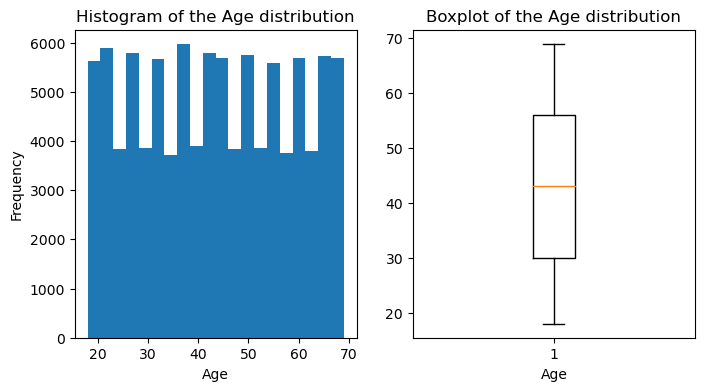

In [68]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Age"].values, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of the Age distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Age"].values)
plt.xlabel("Age")
plt.title("Boxplot of the Age distribution")

plt.show()

As we have a discrete variable we can see that each peak correspond to a different age and there are no ouliers.

Similarly for Quantity as we have a discrete variable each of the peaks represent a diffrent quantity:

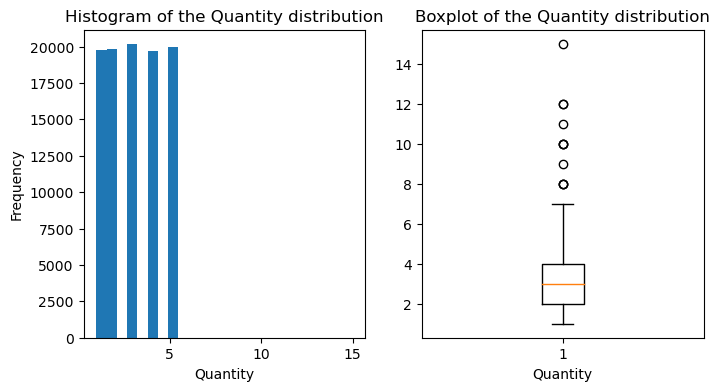

In [69]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Quantity"].values, bins=25)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Histogram of the Quantity distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Quantity"].values)
plt.xlabel("Quantity")
plt.title("Boxplot of the Quantity distribution")

plt.show()

In [70]:
iqr = df["Quantity"].quantile(0.75) - df["Quantity"].quantile(0.25)
outliers = df.loc[df["Quantity"] > df["Quantity"].quantile(0.75) + 1.5 * iqr]
outliers

Invoice_Number        Invoice_Date Customer_ID  Gender  Age    Category  \
11         I139207 2016-10-30 10:00:00     C191708  Female   29       Books   
61         I207205 2016-10-30 10:12:00     C716161  Female   33    Clothing   
100        I283443 2016-10-30 10:21:00     C189493    Male   43  Technology   
109        I293215 2016-10-30 10:23:00     C166635    Male   18   Cosmetics   
129        I160221 2016-10-30 10:28:00     C319231    Male   25    Clothing   
145        I246375 2016-10-30 10:32:00     C236365  Female   67   Cosmetics   
201        I286193 2016-10-30 10:45:00     C322994    Male   37   Cosmetics   
224        I353272 2016-10-30 10:50:00     C199311  Female   34    Clothing   
246        I215578 2016-10-30 10:55:00     C866033    Male   39   Cosmetics   
275        I282789 2016-10-30 11:02:00     C172185  Female   67   Cosmetics   
305        I115679 2016-10-30 11:09:00     C266462    Male   27    Clothing   

     Quantity  Selling_Price_Per_Unit  Cost_Per_Unit Payment_Method   Region  \
11          8                   15.15          15.10    Credit Card     West   
61         10                  300.08         225.06     Debit Card     East   
100        15                 3150.00        2677.50    Credit Card  Central   
109        12                  162.64         130.11    Credit Card  Central   
129        10                  900.24         675.18           Cash     West   
145         8                   81.32          56.92           Cash     West   
201         9                  121.98         118.48           Cash     West   
224        10                  300.08         292.06    Credit Card     East   
246         8                   81.32          76.92    Credit Card  Central   
275        12                   81.32          76.92           Cash     West   
305        11                  300.08         285.06           Cash  Central   

        State     Shopping_Mall  Revenue  State_Rank  State_Population_2020  \
11      Idaho      Zorlu Center     0.36          38                1839106   
61   New York            Kanyon   750.20           4               20201249   
100  Illinois    Viaport Outlet  7087.50           6               12801989   
109  Illinois      Istinye Park   390.34           6               12801989   
129    Oregon  Mall of Istanbul  2250.60          27                4237256   
145    Oregon            Kanyon   195.17          27                4237256   
201  Colorado      Istinye Park    31.45          21                5773714   
224      Ohio      Istinye Park    80.20           7               11799448   
246      Iowa            Kanyon    35.17          31                3271616   
275     Idaho      Istinye Park    52.75          38                1839106   
305  Michigan            Kanyon   165.22          10               10077331   

     State_Percent_Of_Total  
11                   0.0054  
61                   0.0586  
100                  0.0382  
109                  0.0382  
129                  0.0127  
145                  0.0127  
201                  0.0174  
224                  0.0352  
246                  0.0095  
275                  0.0054  
305                  0.0301

Here we have a few outliers which are the orders with higher quantites of items purchased. We chose not to remove them as there are only a few cases.

For the Selling Price Per Unit column our histogram is very sweked to the left and we have many outliers:

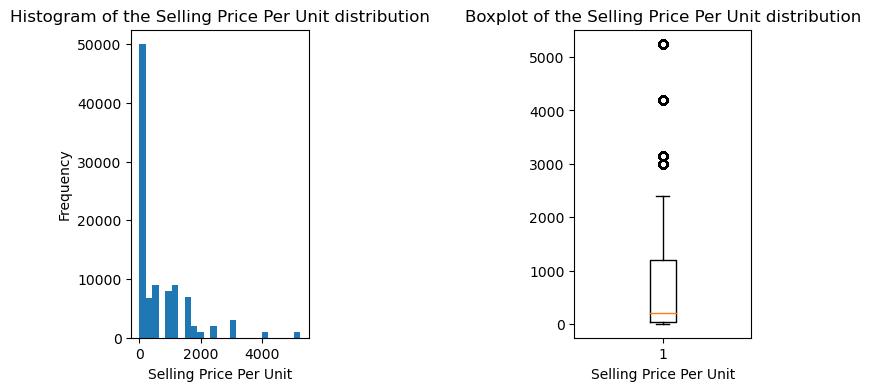

In [71]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Selling_Price_Per_Unit"].values, bins=25)
plt.xlabel("Selling Price Per Unit")
plt.ylabel("Frequency")
plt.title("Histogram of the Selling Price Per Unit distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Selling_Price_Per_Unit"].values)
plt.xlabel("Selling Price Per Unit")
plt.title("Boxplot of the Selling Price Per Unit distribution")

plt.subplots_adjust(hspace=0.5, wspace=1.5) 

plt.show()

In [72]:
iqr = df["Selling_Price_Per_Unit"].quantile(0.75) - df["Selling_Price_Per_Unit"].quantile(0.25)
outliers = df.loc[df["Selling_Price_Per_Unit"] > df["Selling_Price_Per_Unit"].quantile(0.75) + 1.5 * iqr]
outliers

Invoice_Number        Invoice_Date Customer_ID  Gender  Age    Category  \
3            I173702 2016-10-30 09:58:00     C988172  Female   66       Shoes   
15           I688768 2016-10-30 10:01:00     C362288    Male   24       Shoes   
23           I252275 2016-10-30 10:03:00     C313348    Male   44  Technology   
53           I160777 2016-10-30 10:10:00     C626042  Female   43  Technology   
69           I883721 2016-10-30 10:14:00     C236859  Female   44  Technology   
...              ...                 ...         ...     ...  ...         ...   
99332        I206967 2016-11-15 12:15:00     C232954  Female   53       Shoes   
99374        I221532 2016-11-15 12:25:00     C956894    Male   36  Technology   
99387        I429361 2016-11-15 12:28:00     C258359    Male   33  Technology   
99424        I549710 2016-11-15 12:37:00     C541824  Female   34  Technology   
99455        I702964 2016-11-15 12:44:00     C800631    Male   56  Technology   

       Quantity  Selling_Price_Per_Unit  Cost_Per_Unit Payment_Method  \
3             5                 3000.85        2900.76    Credit Card   
15            5                 3000.85        2700.76    Credit Card   
23            5                 5250.00        4725.00           Cash   
53            4                 4200.00        3780.00           Cash   
69            5                 5250.00        4725.00    Credit Card   
...         ...                     ...            ...            ...   
99332         5                 3000.85        2700.76    Credit Card   
99374         3                 3150.00        2677.50    Credit Card   
99387         3                 3150.00        2677.50    Credit Card   
99424         3                 3150.00        2677.50           Cash   
99455         4                 4200.00        3780.00           Cash   

        Region         State     Shopping_Mall  Revenue  State_Rank  \
3        South       Florida      Metropol AVM   500.43           3   
15     Central         Texas    Viaport Outlet  1500.43           2   
23        East  Pennsylvania            Kanyon  2625.00           5   
53        East      New York         Metrocity  1680.00           4   
69       South      Virginia  Mall of Istanbul  2625.00          12   
...        ...           ...               ...      ...         ...   
99332  Central         Texas         Metrocity  1500.43           2   
99374     West         Idaho      Metropol AVM  1417.50          38   
99387    South       Georgia            Kanyon  1417.50           8   
99424     West       Arizona         Metrocity  1417.50          14   
99455    South       Georgia      Istinye Park  1680.00           8   

       State_Population_2020  State_Percent_Of_Total  
3                   21538187                  0.0647  
15                  29145505                  0.0874  
23                  13002700                  0.0386  
53                  20201249                  0.0586  
69                   8631393                  0.0257  
...                      ...                     ...  
99332               29145505                  0.0874  
99374                1839106                  0.0054  
99387               10711908                  0.0320  
99424                7151502                  0.0219  
99455               10711908                  0.0320  

[5024 rows x 17 columns]

There are many outliers in this column as the column is left skewed meaning that a large portion of the distribution is closer to 0. We can't remove these outliers as they represent the more expensive product which will be of iterest in part 3.

For the Cost Per Unit column we have a similar distribution:

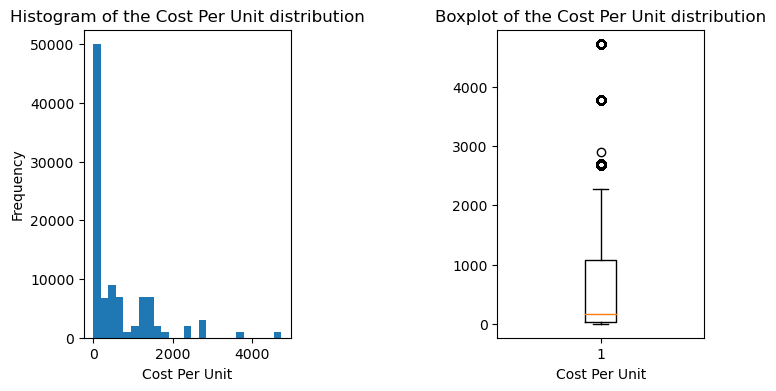

In [73]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Cost_Per_Unit"].values, bins=25)
plt.xlabel("Cost Per Unit")
plt.ylabel("Frequency")
plt.title("Histogram of the Cost Per Unit distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Cost_Per_Unit"].values)
plt.xlabel("Cost Per Unit")
plt.title("Boxplot of the Cost Per Unit distribution")

plt.subplots_adjust(hspace=0.5, wspace=1) 

plt.show()

In [74]:
iqr = df["Cost_Per_Unit"].quantile(0.75) - df["Cost_Per_Unit"].quantile(0.25)
outliers = df.loc[df["Cost_Per_Unit"] > df["Cost_Per_Unit"].quantile(0.75) + 1.5 * iqr]
outliers

Invoice_Number        Invoice_Date Customer_ID  Gender  Age    Category  \
3            I173702 2016-10-30 09:58:00     C988172  Female   66       Shoes   
15           I688768 2016-10-30 10:01:00     C362288    Male   24       Shoes   
23           I252275 2016-10-30 10:03:00     C313348    Male   44  Technology   
53           I160777 2016-10-30 10:10:00     C626042  Female   43  Technology   
69           I883721 2016-10-30 10:14:00     C236859  Female   44  Technology   
...              ...                 ...         ...     ...  ...         ...   
99332        I206967 2016-11-15 12:15:00     C232954  Female   53       Shoes   
99374        I221532 2016-11-15 12:25:00     C956894    Male   36  Technology   
99387        I429361 2016-11-15 12:28:00     C258359    Male   33  Technology   
99424        I549710 2016-11-15 12:37:00     C541824  Female   34  Technology   
99455        I702964 2016-11-15 12:44:00     C800631    Male   56  Technology   

       Quantity  Selling_Price_Per_Unit  Cost_Per_Unit Payment_Method  \
3             5                 3000.85        2900.76    Credit Card   
15            5                 3000.85        2700.76    Credit Card   
23            5                 5250.00        4725.00           Cash   
53            4                 4200.00        3780.00           Cash   
69            5                 5250.00        4725.00    Credit Card   
...         ...                     ...            ...            ...   
99332         5                 3000.85        2700.76    Credit Card   
99374         3                 3150.00        2677.50    Credit Card   
99387         3                 3150.00        2677.50    Credit Card   
99424         3                 3150.00        2677.50           Cash   
99455         4                 4200.00        3780.00           Cash   

        Region         State     Shopping_Mall  Revenue  State_Rank  \
3        South       Florida      Metropol AVM   500.43           3   
15     Central         Texas    Viaport Outlet  1500.43           2   
23        East  Pennsylvania            Kanyon  2625.00           5   
53        East      New York         Metrocity  1680.00           4   
69       South      Virginia  Mall of Istanbul  2625.00          12   
...        ...           ...               ...      ...         ...   
99332  Central         Texas         Metrocity  1500.43           2   
99374     West         Idaho      Metropol AVM  1417.50          38   
99387    South       Georgia            Kanyon  1417.50           8   
99424     West       Arizona         Metrocity  1417.50          14   
99455    South       Georgia      Istinye Park  1680.00           8   

       State_Population_2020  State_Percent_Of_Total  
3                   21538187                  0.0647  
15                  29145505                  0.0874  
23                  13002700                  0.0386  
53                  20201249                  0.0586  
69                   8631393                  0.0257  
...                      ...                     ...  
99332               29145505                  0.0874  
99374                1839106                  0.0054  
99387               10711908                  0.0320  
99424                7151502                  0.0219  
99455               10711908                  0.0320  

[5024 rows x 17 columns]

We find the same outiers as in the Selling Price Per Unit column(as both columns are correlated). Similarly we can't remove these outliers as they represent the more expensive product which could be an interessting subset for part 3.

For Revenue the distribution is also left skewed and there are many outliers:

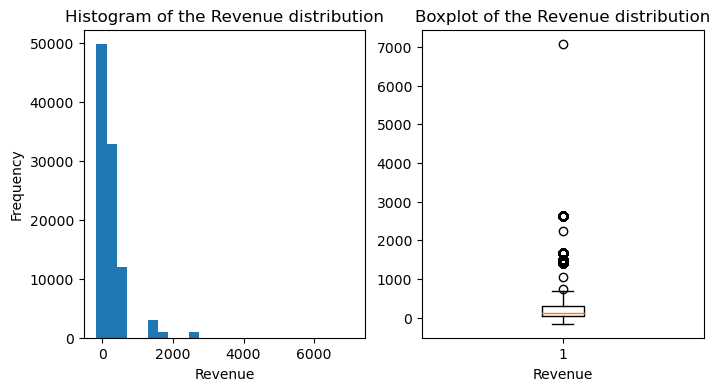

In [75]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["Revenue"].values, bins=25)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Histogram of the Revenue distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["Revenue"].values)
plt.xlabel("Revenue")
plt.title("Boxplot of the Revenue distribution")


plt.show()

In [76]:
iqr = df["Revenue"].quantile(0.75) - df["Revenue"].quantile(0.25)
outliers = df.loc[df["Revenue"] > df["Revenue"].quantile(0.75) + 1.5 * iqr]
outliers

Invoice_Number        Invoice_Date Customer_ID  Gender  Age    Category  \
15           I688768 2016-10-30 10:01:00     C362288    Male   24       Shoes   
23           I252275 2016-10-30 10:03:00     C313348    Male   44  Technology   
53           I160777 2016-10-30 10:10:00     C626042  Female   43  Technology   
61           I207205 2016-10-30 10:12:00     C716161  Female   33    Clothing   
69           I883721 2016-10-30 10:14:00     C236859  Female   44  Technology   
...              ...                 ...         ...     ...  ...         ...   
99332        I206967 2016-11-15 12:15:00     C232954  Female   53       Shoes   
99374        I221532 2016-11-15 12:25:00     C956894    Male   36  Technology   
99387        I429361 2016-11-15 12:28:00     C258359    Male   33  Technology   
99424        I549710 2016-11-15 12:37:00     C541824  Female   34  Technology   
99455        I702964 2016-11-15 12:44:00     C800631    Male   56  Technology   

       Quantity  Selling_Price_Per_Unit  Cost_Per_Unit Payment_Method  \
15            5                 3000.85        2700.76    Credit Card   
23            5                 5250.00        4725.00           Cash   
53            4                 4200.00        3780.00           Cash   
61           10                  300.08         225.06     Debit Card   
69            5                 5250.00        4725.00    Credit Card   
...         ...                     ...            ...            ...   
99332         5                 3000.85        2700.76    Credit Card   
99374         3                 3150.00        2677.50    Credit Card   
99387         3                 3150.00        2677.50    Credit Card   
99424         3                 3150.00        2677.50           Cash   
99455         4                 4200.00        3780.00           Cash   

        Region         State     Shopping_Mall  Revenue  State_Rank  \
15     Central         Texas    Viaport Outlet  1500.43           2   
23        East  Pennsylvania            Kanyon  2625.00           5   
53        East      New York         Metrocity  1680.00           4   
61        East      New York            Kanyon   750.20           4   
69       South      Virginia  Mall of Istanbul  2625.00          12   
...        ...           ...               ...      ...         ...   
99332  Central         Texas         Metrocity  1500.43           2   
99374     West         Idaho      Metropol AVM  1417.50          38   
99387    South       Georgia            Kanyon  1417.50           8   
99424     West       Arizona         Metrocity  1417.50          14   
99455    South       Georgia      Istinye Park  1680.00           8   

       State_Population_2020  State_Percent_Of_Total  
15                  29145505                  0.0874  
23                  13002700                  0.0386  
53                  20201249                  0.0586  
61                  20201249                  0.0586  
69                   8631393                  0.0257  
...                      ...                     ...  
99332               29145505                  0.0874  
99374                1839106                  0.0054  
99387               10711908                  0.0320  
99424                7151502                  0.0219  
99455               10711908                  0.0320  

[5026 rows x 17 columns]

Here we find even more outliers than in the Selling Price Per Unit and the Cost Per Unit, as the revenue is also calculated based on the quantity (and the Quantity column also had a few outliers). We chose not to remove these outliers as they will be interessting in part 3, given that the highest revenue transactions are very valuable.

For State Rank our distribution is left skewed and we have ouliers:

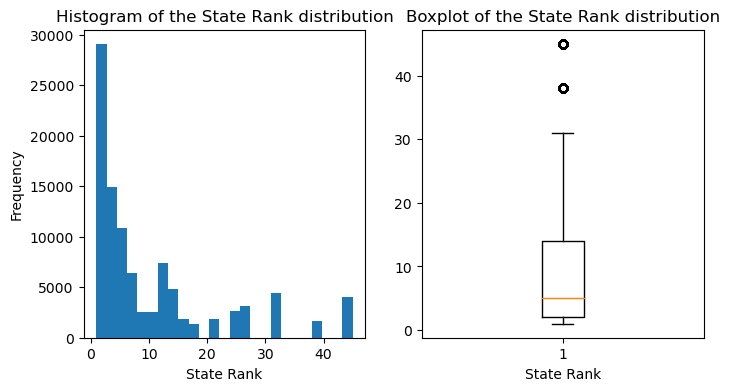

In [77]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["State_Rank"].values, bins=25)
plt.xlabel("State Rank")
plt.ylabel("Frequency")
plt.title("Histogram of the State Rank distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["State_Rank"].values)
plt.xlabel("State Rank")
plt.title("Boxplot of the State Rank distribution")


plt.show()

In [78]:
iqr = df["State_Rank"].quantile(0.75) - df["State_Rank"].quantile(0.25)
outliers = df.loc[df["State_Rank"] > df["State_Rank"].quantile(0.75) + 1.5 * iqr]
print(outliers["State"].unique())
print(outliers["State_Rank"].unique())

['Idaho' 'Delaware']
[38 45]


Here the outliers correspond to the least populated states (in our dataset) Idaho and Delaware, which are ranked 38 and 45 respectively in terms of population count.

For the State Population Count distribution most of the values are concentrated at the lower bottom half, with a few peaks around 20, 30 and 40 million and no outliers:

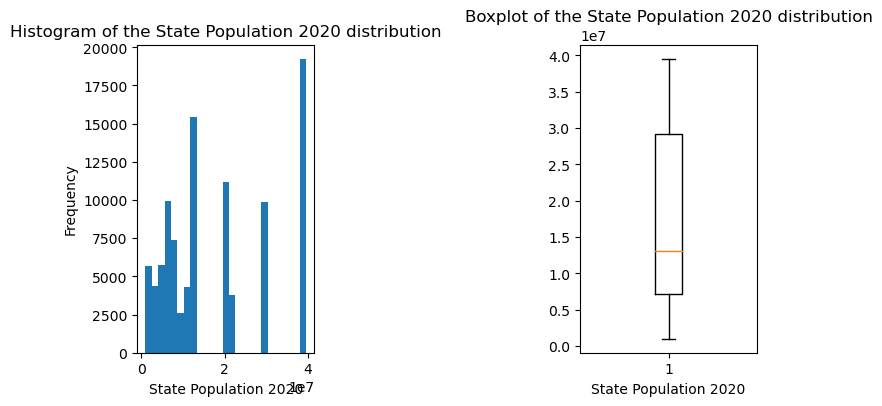

In [79]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["State_Population_2020"].values, bins=25)
plt.xlabel("State Population 2020")
plt.ylabel("Frequency")
plt.title("Histogram of the State Population 2020 distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["State_Population_2020"].values)
plt.xlabel("State Population 2020")
plt.title("Boxplot of the State Population 2020 distribution")

plt.subplots_adjust(hspace=0.5, wspace=1.5) 

plt.show()

For the State Percent Of Total we have an almost identical distribution but scaled down as both columns are correlated, given that our column is calucalted by comparing the state population to the entire country's population:

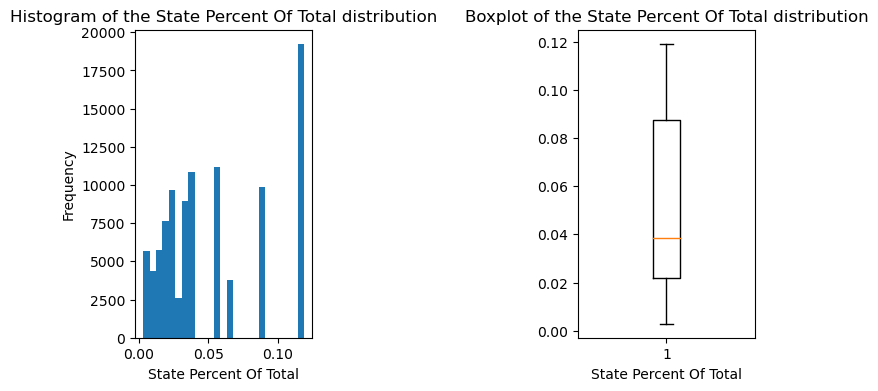

In [80]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(df["State_Percent_Of_Total"].values, bins=25)
plt.xlabel("State Percent Of Total")
plt.ylabel("Frequency")
plt.title("Histogram of the State Percent Of Total distribution")

plt.subplot(1, 2, 2)
plt.boxplot(df["State_Percent_Of_Total"].values)
plt.xlabel("State Percent Of Total")
plt.title("Boxplot of the State Percent Of Total distribution")

plt.subplots_adjust(hspace=0.5, wspace=1.5) 

plt.show()

Now we can take a look at the qualitative variables:

For Gender we can notice there are more female customers in this dataset:

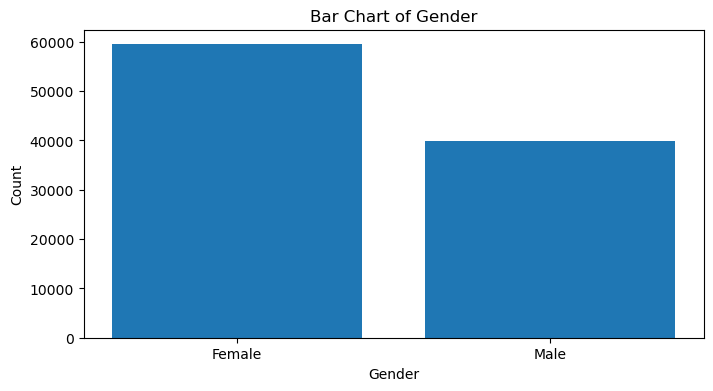

In [81]:
plt.figure(figsize=(8, 4))
plt.bar(df["Gender"].value_counts().index, df["Gender"].value_counts().values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Bar Chart of Gender")
plt.show()

We can see that the most purchased category by far is Clothing, followed by Cosmetics and Food & Beverages

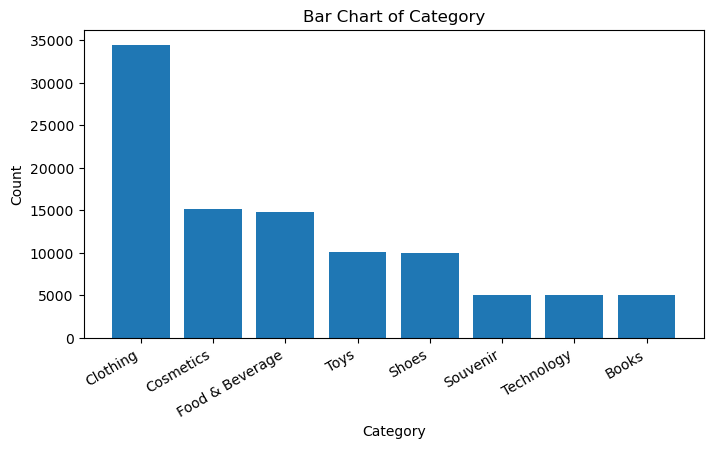

In [82]:
plt.figure(figsize=(8, 4))
plt.bar(df["Category"].value_counts().index, df["Category"].value_counts().values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Bar Chart of Category")
plt.xticks(rotation=30, ha="right")
plt.show()

We can see that most payments are made in cash or credit card:

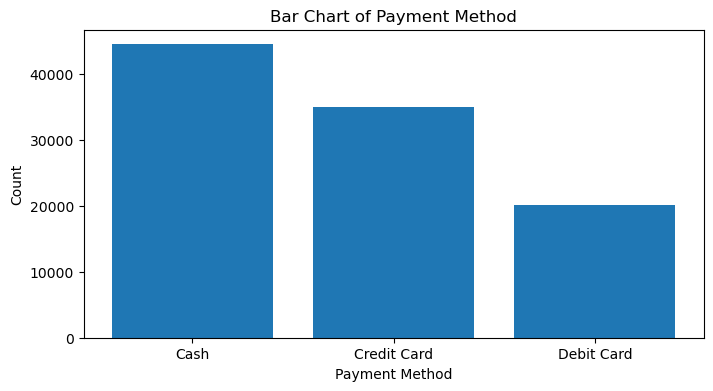

In [83]:
plt.figure(figsize=(8, 4))
plt.bar(df["Payment_Method"].value_counts().index, df["Payment_Method"].value_counts().values)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Bar Chart of Payment Method")
plt.show()

For the Region column, we can notice that most customers are from the West and East states:

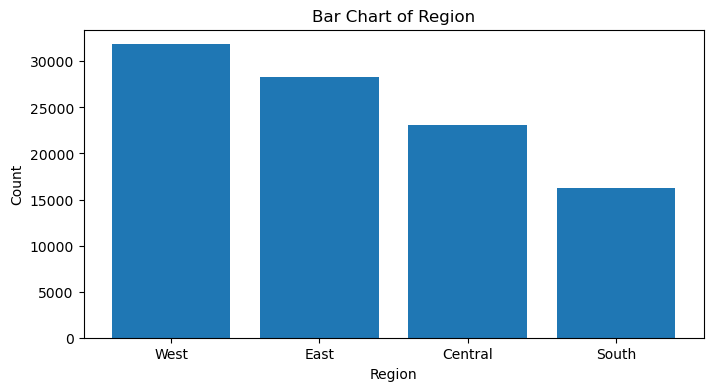

In [84]:
plt.figure(figsize=(8, 4))
plt.bar(df["Region"].value_counts().index, df["Region"].value_counts().values)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Bar Chart of Region")
plt.show()

We can see that most of the orders are from customers living in California, New York or Texas, those correspond to the main customer base:

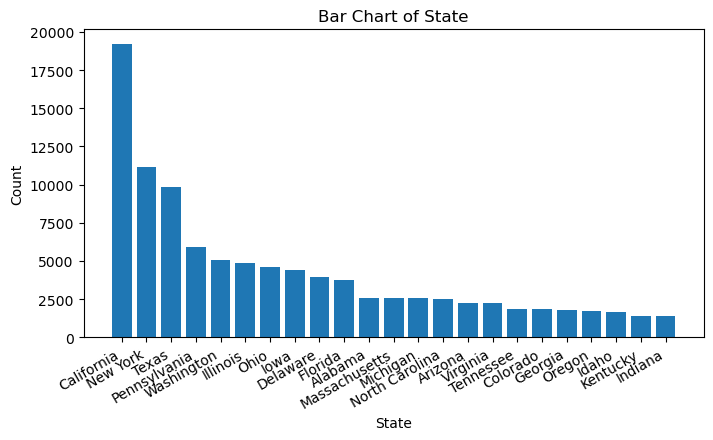

In [85]:
plt.figure(figsize=(8, 4))
plt.bar(df["State"].value_counts().index, df["State"].value_counts().values)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Bar Chart of State")
plt.xticks(rotation=30, ha="right")

plt.show()

Here we have the different mall chains, with Kanyon and Mall of Istanbul having the most cutomer order:

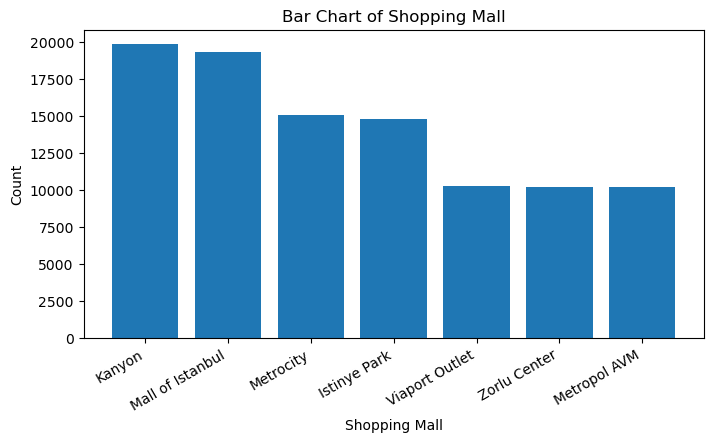

In [86]:
plt.figure(figsize=(8, 4))
plt.bar(df["Shopping_Mall"].value_counts().index, df["Shopping_Mall"].value_counts().values)
plt.xlabel("Shopping Mall")
plt.ylabel("Count")
plt.title("Bar Chart of Shopping Mall")
plt.xticks(rotation=30, ha="right")

plt.show()

We can also have a look at the correlation between quantitative variables on a heatmap:

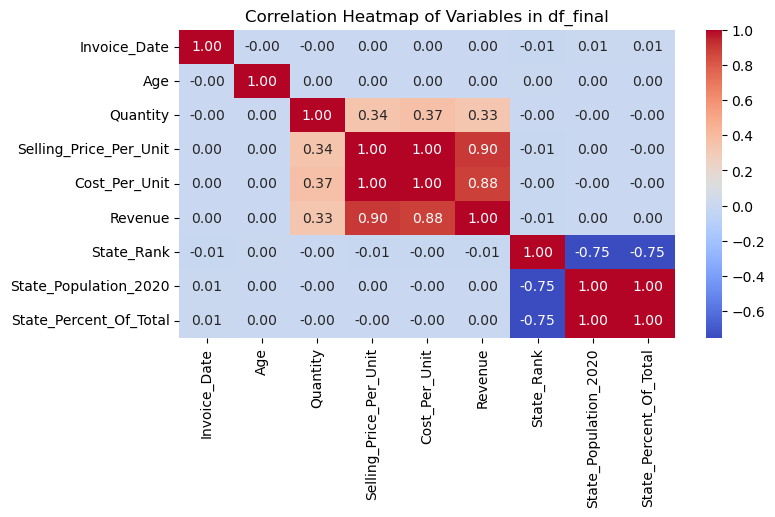

In [87]:
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64', 'datetime64[ns]']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Heatmap of Variables in df_final')
plt.show()

We can notice that the selling, cost and reveune coumns are highly correlated which makes sense as they are derived from each other. The Quantity column is also unsurprisingly correlated to these 3 columns (as it is used to calculate the revenue).
We can also see that the State Population count and the State Percentage columns are highly correlated together and negatively correlated with the Rank column which is expected.

Now that we have seen the distributions of all the other columns of the dataframe, we can focuss on the timeseries column Invoice Date.

We set the Invoice Date column as the index of our dataframe to be able to make plots:

In [88]:
df.set_index('Invoice_Date', inplace=True)
df

Invoice_Number Customer_ID  Gender  Age         Category  \
Invoice_Date                                                                   
2016-10-30 09:58:00        I138884     C241288  Female   28         Clothing   
2016-10-30 09:58:00        I317333     C111565    Male   21            Shoes   
2016-10-30 09:58:00        I127801     C266599    Male   20         Clothing   
2016-10-30 09:58:00        I173702     C988172  Female   66            Shoes   
2016-10-30 09:59:00        I337046     C189076  Female   53            Books   
...                            ...         ...     ...  ...              ...   
2016-11-15 12:43:00        I219422     C441542  Female   45         Souvenir   
2016-11-15 12:43:00        I325143     C569580    Male   27  Food & Beverage   
2016-11-15 12:44:00        I824010     C103292    Male   63  Food & Beverage   
2016-11-15 12:44:00        I702964     C800631    Male   56       Technology   
2016-11-15 12:44:00        I232867     C273973  Female   36         Souvenir   

                     Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
Invoice_Date                                                           
2016-10-30 09:58:00         5                 1500.40        1425.38   
2016-10-30 09:58:00         3                 1800.51        1620.46   
2016-10-30 09:58:00         1                  300.08         295.06   
2016-10-30 09:58:00         5                 3000.85        2900.76   
2016-10-30 09:59:00         4                   60.60          45.45   
...                       ...                     ...            ...   
2016-11-15 12:43:00         5                   58.65          43.99   
2016-11-15 12:43:00         2                   10.46           7.32   
2016-11-15 12:44:00         2                   10.46           7.32   
2016-11-15 12:44:00         4                 4200.00        3780.00   
2016-11-15 12:44:00         3                   35.19          24.63   

                    Payment_Method Region       State     Shopping_Mall  \
Invoice_Date                                                              
2016-10-30 09:58:00    Credit Card  South    Kentucky            Kanyon   
2016-10-30 09:58:00     Debit Card  South    Kentucky    Viaport Outlet   
2016-10-30 09:58:00           Cash   West  California         Metrocity   
2016-10-30 09:58:00    Credit Card  South     Florida      Metropol AVM   
2016-10-30 09:59:00           Cash  South     Florida            Kanyon   
...                            ...    ...         ...               ...   
2016-11-15 12:43:00    Credit Card  South     Alabama            Kanyon   
2016-11-15 12:43:00           Cash  South     Alabama    Viaport Outlet   
2016-11-15 12:44:00     Debit Card  South     Alabama         Metrocity   
2016-11-15 12:44:00           Cash  South     Georgia      Istinye Park   
2016-11-15 12:44:00    Credit Card  South     Georgia  Mall of Istanbul   

                     Revenue  State_Rank  State_Population_2020  \
Invoice_Date                                                      
2016-10-30 09:58:00   375.10          26                4505836   
2016-10-30 09:58:00   540.15          26                4505836   
2016-10-30 09:58:00     5.02           1               39538223   
2016-10-30 09:58:00   500.43           3               21538187   
2016-10-30 09:59:00    60.60           3               21538187   
...                      ...         ...                    ...   
2016-11-15 12:43:00    73.31          24                5024279   
2016-11-15 12:43:00     6.28          24                5024279   
2016-11-15 12:44:00     6.28          24                5024279   
2016-11-15 12:44:00  1680.00           8               10711908   
2016-11-15 12:44:00    31.67           8               10711908   

                     State_Percent_Of_Total  
Invoice_Date                                 
2016-10-30 09:58:00                  0.0135  
2016-10-30 09:58:00                  0.0135  
2016-10-30

We can look at the evolution of the orders in our dataframe, our timeseries has multiple datapoints each minute.<br>
So first we will resample our timeseries by day:

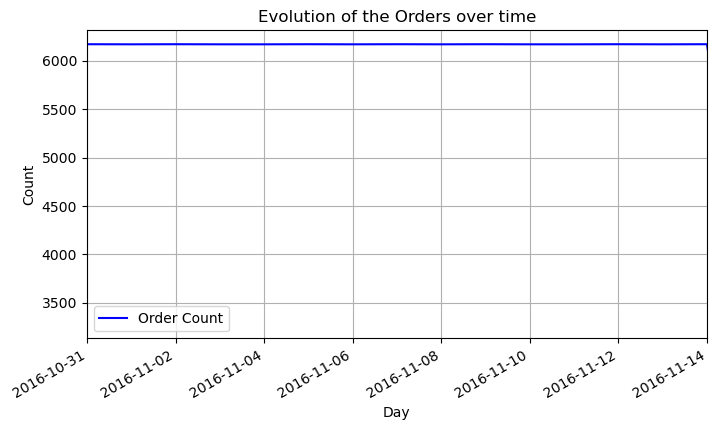

In [89]:
from datetime import datetime

plt.figure(figsize=(8, 4))
plt.plot(df.resample('D').size(), label='Order Count', color='blue')

plt.title('Evolution of the Orders over time')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))#we manually define the x axis limits
plt.xticks(pd.date_range('2016-10-31', '2016-11-14', freq='2D'), rotation=30, ha="right")# and the xticks to fix the display of the timeseries
plt.legend()
plt.grid(True)

plt.show()

As there isn't much evolution between the number of orders each day, we can't see any change on the graph. We can resample the timeseries by hour instead:

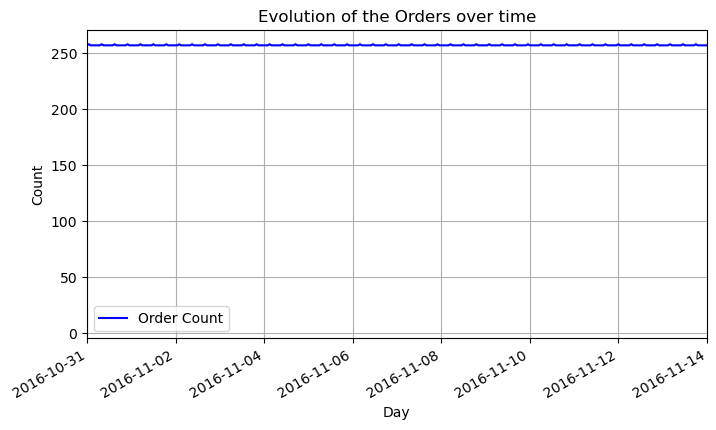

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(df.resample('H').size(), label='Order Count', color='blue')

plt.title('Evolution of the Orders over time')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.xticks(pd.date_range('2016-10-31', '2016-11-14', freq='2D'), rotation=30, ha="right")
plt.legend()
plt.grid(True)

plt.show()

Here we can see the very slight variations of the timeseries. 

If we choose to smooth the time series we get the same graph as when resampled by day:

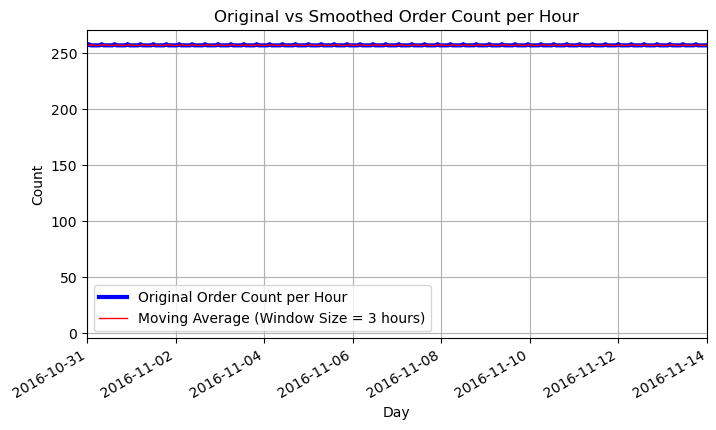

In [91]:
plt.figure(figsize=(8, 4))
plt.plot(df.resample('H').size().index, df.resample('H').size(), label='Original Order Count per Hour', color='blue', linewidth=3)

window_size = 3
moving_average = df.resample('H').size().rolling(window=window_size).mean()

plt.plot(moving_average.index, moving_average, label=f'Moving Average (Window Size = {window_size} hours)', color='red', linewidth=1)

plt.title('Original vs Smoothed Order Count per Hour')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.xticks(pd.date_range('2016-10-31', '2016-11-14', freq='2D'), rotation=30, ha="right")
plt.legend()
plt.grid(True)
plt.show()

Now we can look at how the time series fluctuates in regards to different groups for each column.

For Revenue we chose groups based on the values of the quartiles and can see the variation between groups:

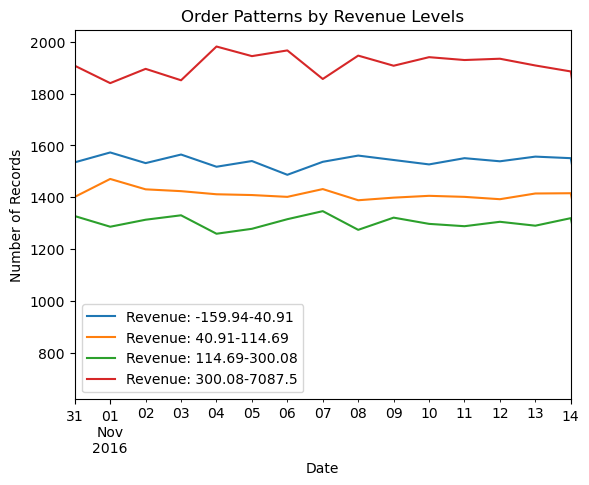

In [92]:
revenue_levels = [(-159.94, 40.91), (40.91, 114.69), (114.69, 300.08), (300.08, 7087.50)]#we pick groups based on the quantiles

for revenue_level in revenue_levels:
    revenue_subset = df[(df['Revenue'] >= revenue_level[0]) & (df['Revenue'] < revenue_level[1])]
    revenue_subset.resample('D').size().plot(label=f'Revenue: {revenue_level[0]}-{revenue_level[1]}')

plt.title('Order Patterns by Revenue Levels')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend()
plt.show()

We can notice that the higher end transactions that generate the most revenue occur the most, followed by the lower end ones and then the mid range orders. We can also notice that the higher revenue transactions fluctuate more over time which makes sense as the amount of customers making higher purchases can vary a lot from day to day.

Now we can look at the Age column:

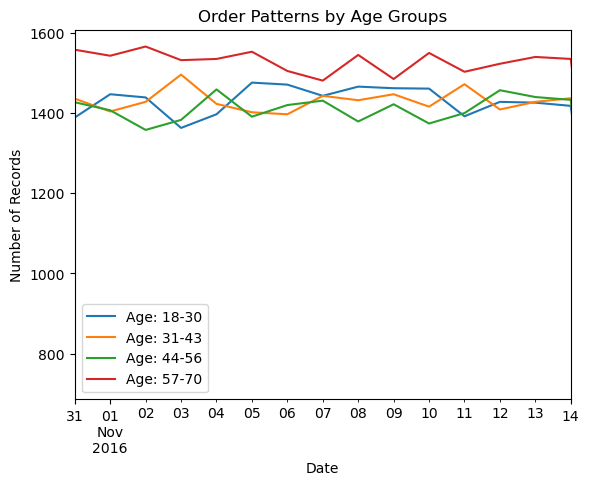

In [93]:
age_groups = [(18, 30), (31, 43), (44, 56), (57, 70)]#we pick the groups based on the quartiles

for age_group in age_groups:
    age_subset = df[(df['Age'] >= age_group[0]) & (df['Age'] < age_group[1])]
    age_subset.resample('D').size().plot(label=f'Age: {age_group[0]}-{age_group[1]}')

plt.title('Order Patterns by Age Groups')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend()
plt.show()

We can notice that the number of orders made by the different age groups varries a lot which shows that our customer base is diverse. There are no age groups that stand out having a strictly positive increase.

Similarly for Quantity, while there are many variations in the number of orders each day, none of the quantity groups particualry stands out.

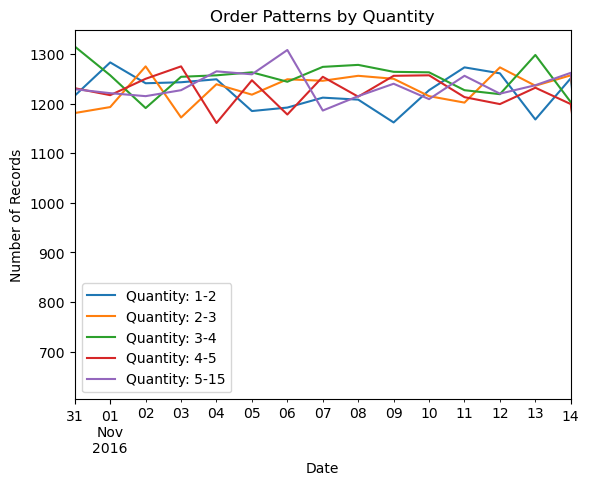

In [94]:
quantity = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 15)] #we pick the groups based on the quartiles

for quant in quantity:
    quantity_subset = df[(df['Quantity'] >= quant[0]) & (df['Quantity'] < quant[1])]
    quantity_subset.resample('D').size().plot(label=f'Quantity: {quant[0]}-{quant[1]}')

plt.title('Order Patterns by Quantity')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend()
plt.show()

For the State Rank column, this graph integrates the information of the State column. Indeed we can see that the most populated state California accounts for a large majority of the sales. We can also see that the highest ranked states and the lowest ranked states have similar amounts of orders.

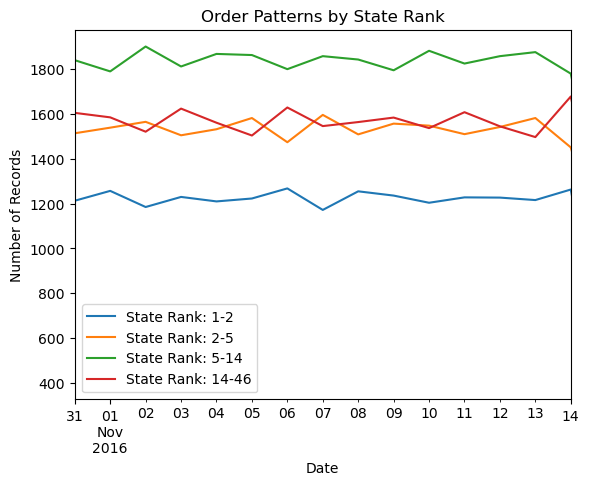

In [95]:
ranks = [(1, 2), (2, 5), (5, 14), (14, 46)] #we pick the groups based on the quartiles

for rank in ranks:
    rank_subset = df[(df['State_Rank'] >= rank[0]) & (df['State_Rank'] < rank[1])]
    rank_subset.resample('D').size().plot(label=f'State Rank: {rank[0]}-{rank[1]}')

plt.title('Order Patterns by State Rank')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend()
plt.show()

For Gender we can see that the variation in each group is very similar, and the female group has a higher number of total orders as there are more female customers in this datset.

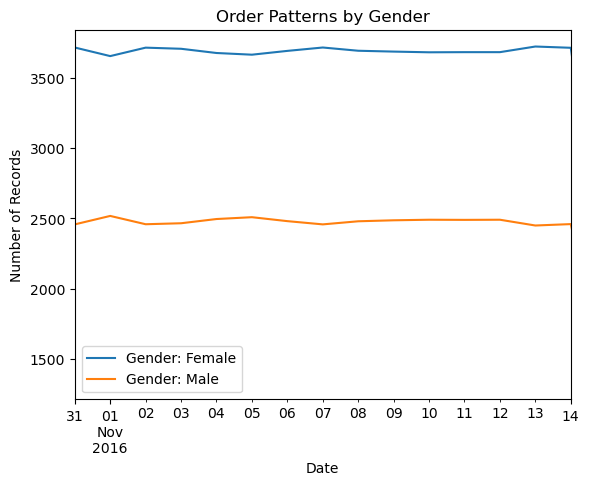

In [96]:
categories = ['Female', 'Male']

for category in categories:
    category_subset = df[df['Gender'] == category]
    category_subset.resample('D').size().plot(label=f'Gender: {category}')

plt.title('Order Patterns by Gender')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend()
plt.show()


For the Category column we can notice that the clothing category is way above all the others and there are clusters of categories with similar trends : Cosmetics and Food & Beverages, Shoes and Toys, Technolgy, Souvenirs and Books, which makes sense with our previous bar plot of the categories. There seems to be a very slight increase in the orders(mostly visible for the clothing category) as we aproach the holiday season.

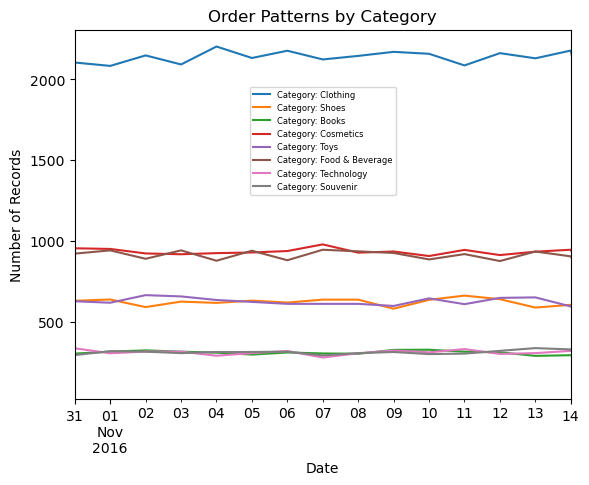

In [97]:
categories = df_final['Category'].unique()

for category in categories:
    category_subset = df[df['Category'] == category]
    category_subset.resample('D').size().plot(label=f'Category: {category}')

plt.title('Order Patterns by Category')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend(fontsize=6, loc='center',bbox_to_anchor=(0.5, 0.7))
plt.show()


For the Payment Method column we can see there isn't much fluctuation in the amount of orders made using each payment method, and customer prefer cash payments oder card. This could be because customers are less comfortable with entering their paymant details on the app and prefer paying on delivery.

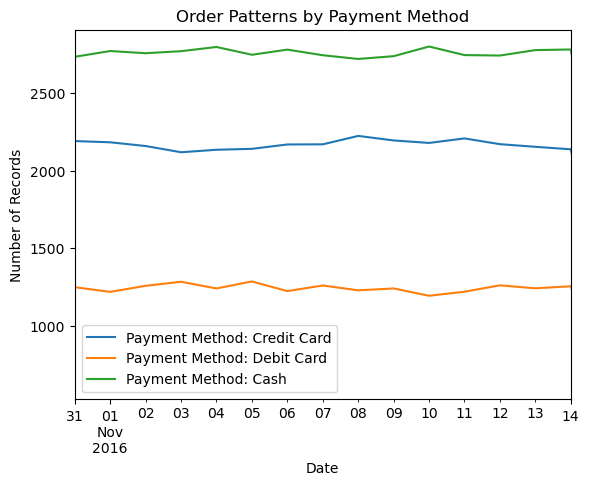

In [98]:
categories = df['Payment_Method'].unique()

for category in categories:
    category_subset = df[df['Payment_Method'] == category]
    category_subset.resample('D').size().plot(label=f'Payment Method: {category}')

plt.title('Order Patterns by Payment Method')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend()
plt.show()


When looking at the Region column, we can see there is a lot of variation West, East and South as these regions encompass many states in the dataset. We can also notice that West and East have a higher number of orders than the other region as they contain leading states in that regard.

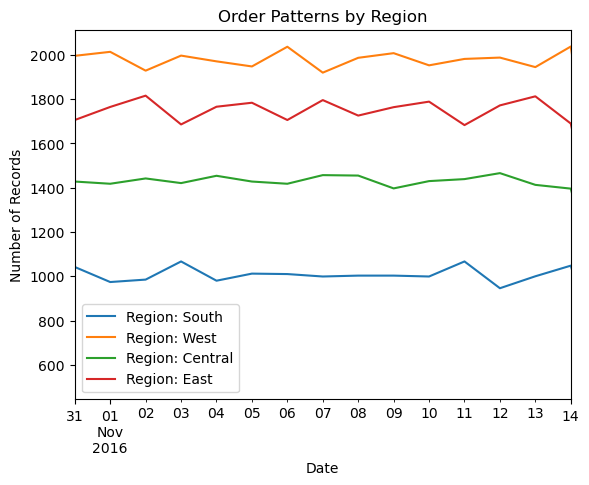

In [99]:
categories = df['Region'].unique()

for category in categories:
    category_subset = df[df['Region'] == category]
    category_subset.resample('D').size().plot(label=f'Region: {category}')

plt.title('Order Patterns by Region')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend()
plt.show()

Now we can have a look at the state column to see things in more detail and se the bigger picture:

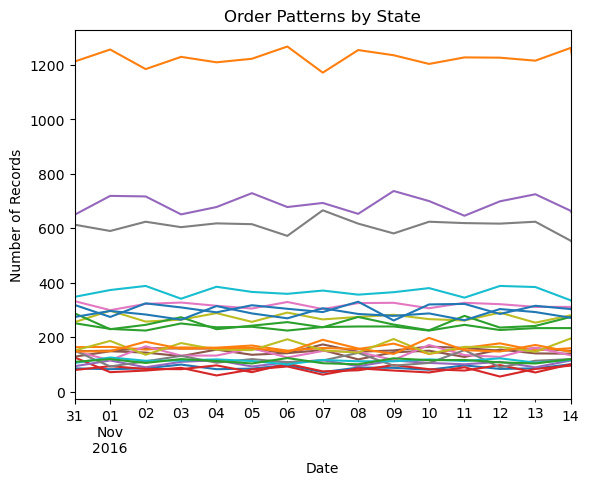

In [100]:
categories = df['State'].unique()

for category in categories:
    category_subset = df[df['State'] == category]
    category_subset.resample('D').size().plot(label=f'State: {category}')

plt.title('Order Patterns by State')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.show()

As it is quite hard to see the variation for all the states in a same graph, we can create subgroups based on the number of orders and plot multiple graphs:

In [101]:
df['State'].value_counts()

State
California        19204
New York          11171
Texas              9856
Pennsylvania       5928
Washington         5096
Illinois           4899
Ohio               4618
Iowa               4393
Delaware           3985
Florida            3789
Alabama            2608
Massachusetts      2604
Michigan           2581
North Carolina     2511
Arizona            2272
Virginia           2271
Tennessee          1840
Colorado           1836
Georgia            1799
Oregon             1739
Idaho              1696
Kentucky           1391
Indiana            1370
Name: count, dtype: int64

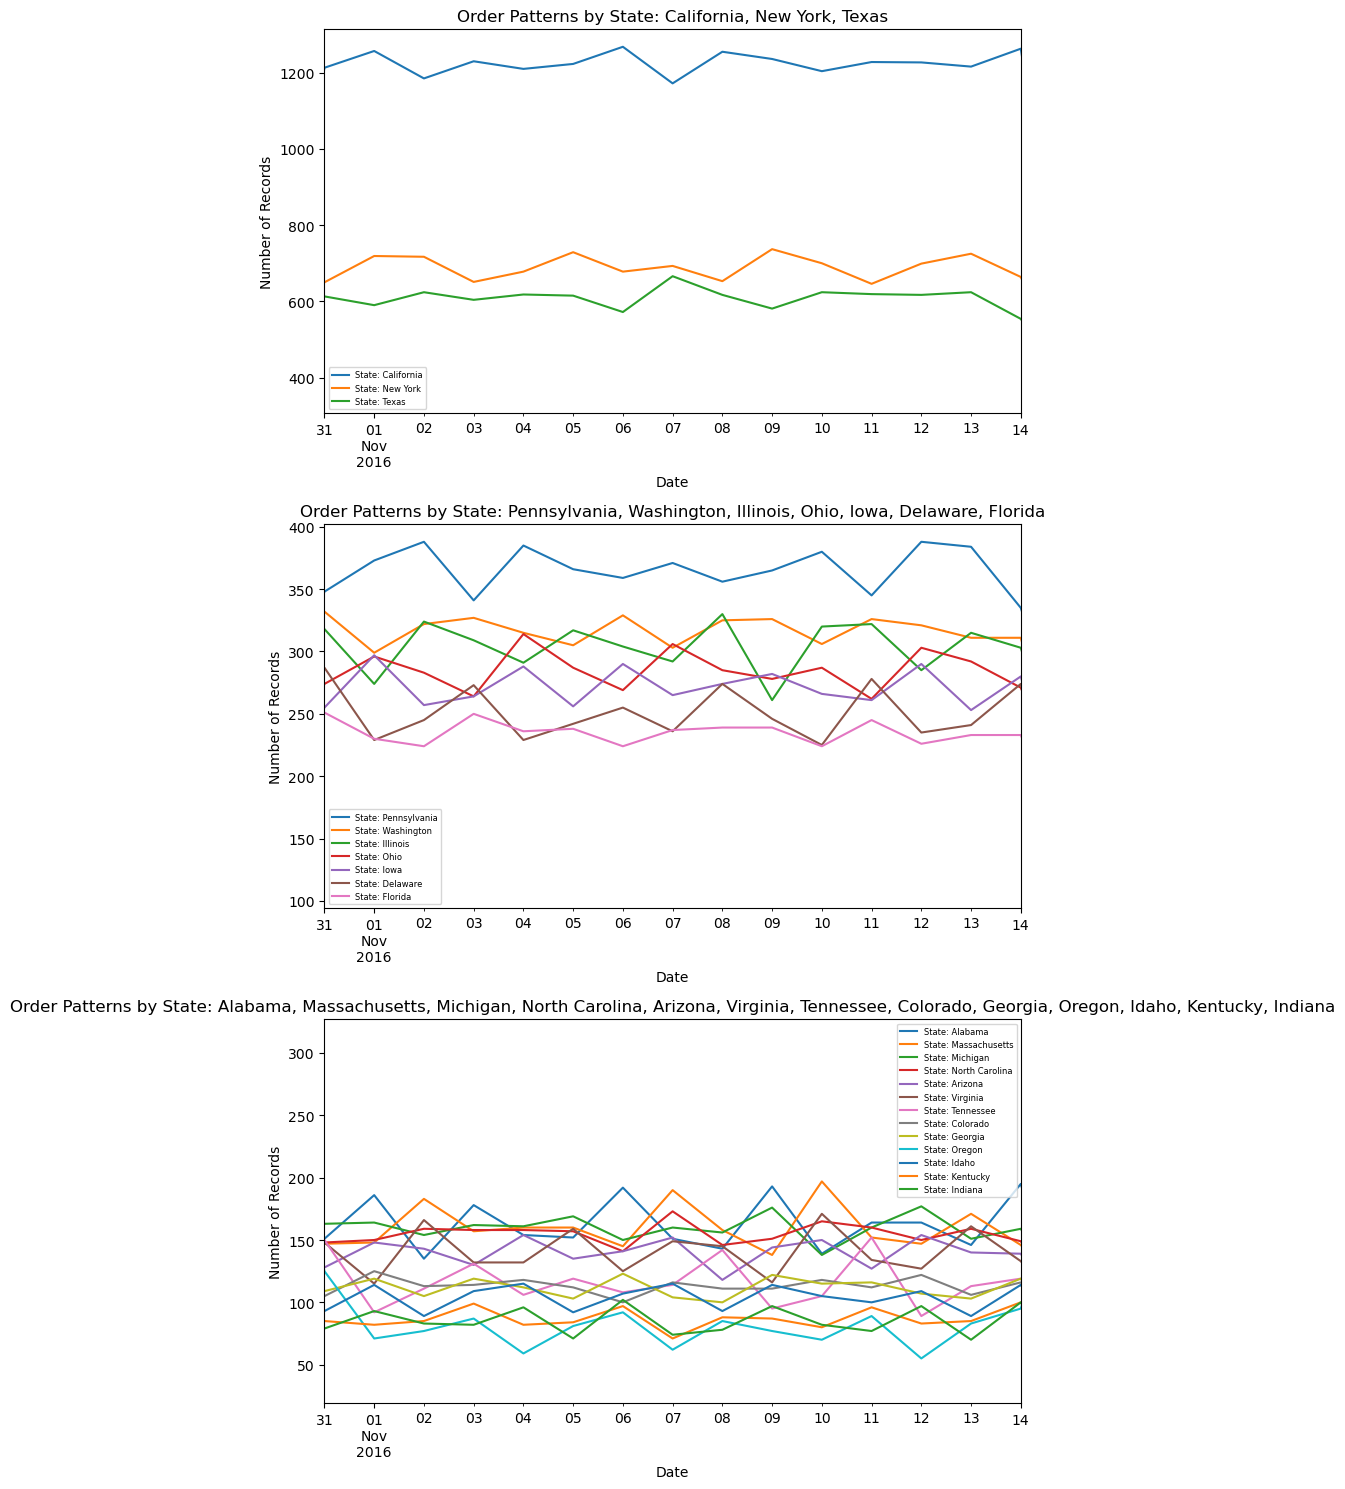

In [102]:
#we group the states together based on the value counts, states with similar number of orders are grouped together
categories = [['California', 'New York', 'Texas'], ['Pennsylvania', 'Washington', 'Illinois', 'Ohio', 'Iowa', 'Delaware', 'Florida'], ['Alabama', 'Massachusetts', 'Michigan', 'North Carolina', 'Arizona', 'Virginia', 'Tennessee', 'Colorado', 'Georgia', 'Oregon', 'Idaho', 'Kentucky', 'Indiana']]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))#we create 3 plots based on the groups using subplots

for i, category in enumerate(categories):
    for state in category:#for each group we plot the timeseries for the state
        state_subset = df[df['State'] == state]
        state_subset.resample('D').size().plot(ax=axes[i], label=f'State: {state}')
    
    axes[i].set_title(f'Order Patterns by State: {", ".join(category)}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Records')
    axes[i].set_xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
    axes[i].legend(fontsize=6)

plt.tight_layout()
plt.show()

On the 1st subplot, we can notice that numbers of orders in California ends on an increase, while in Texas and New York they are decreasing. On the other graphs we notice similar trends between the states (for example Massachusetts and North Caarolina) but with less intensity of the peaks or delay of the phases.

We can also see if there is a correlation between the State column and the State Population count column, as it would make sense that there are more orders made by customers living in the more populated states: 

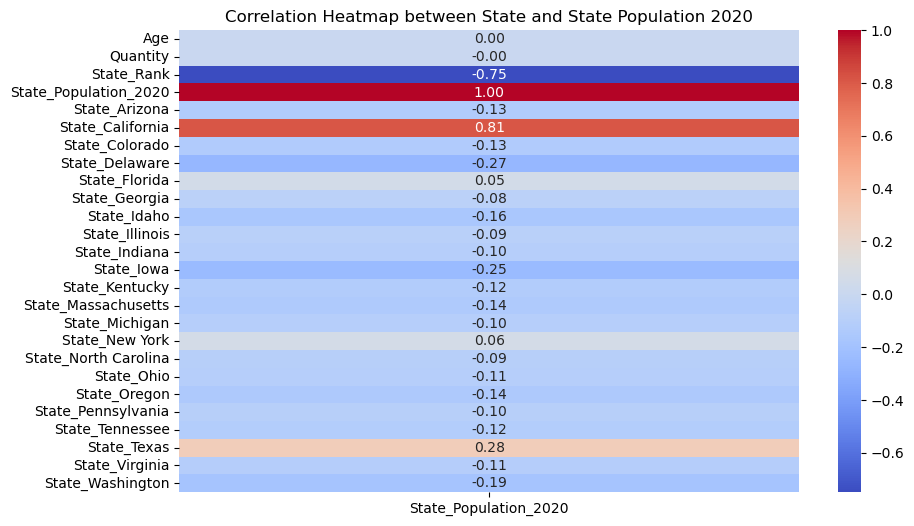

In [103]:
df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)#we need to transform the State column using get dummies as 
                                                            #we have a categorical varriable so we can't calculate a correlation
numeric_columns = df_encoded.select_dtypes(include=['int64', 'bool']).columns
correlation_matrix = df_encoded[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['State_Population_2020']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between State and State Population 2020')
plt.show()

We can see that only California is highly correlated with the State Population(as it is the most populated state with the most orders), and that Texas is also slightly positively correlated. All the other states do not seem correlated with the population count they are even slightly negatively correlated

For the Shopping Mall column we have the following graph:

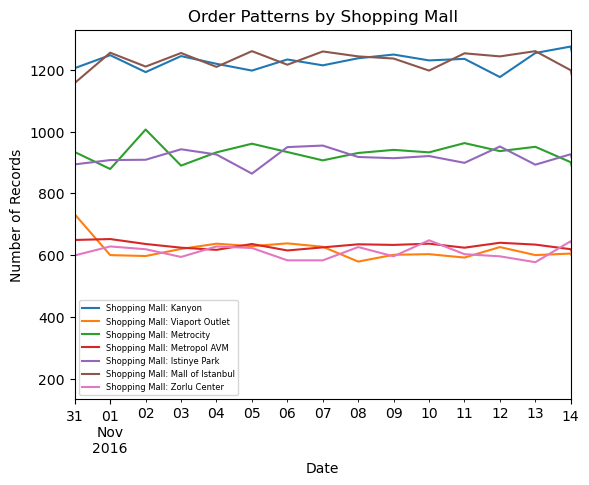

In [104]:
categories = df['Shopping_Mall'].unique()

for category in categories:
    category_subset = df[df['Shopping_Mall'] == category]
    category_subset.resample('D').size().plot(label=f'Shopping Mall: {category}')

plt.title('Order Patterns by Shopping Mall')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
plt.legend(fontsize='6')
plt.show()

We can notice the clusters of shopping malls with similar amount of  total orders in all the stores in the different states. Most malls show a lot of variation expect the Metropol AVM, which seems to have a steady customer traffic per day. Perhaps this mall differs from the others in terms of ammenities.

We can also compare the orders for different malls of the same chain in different states:

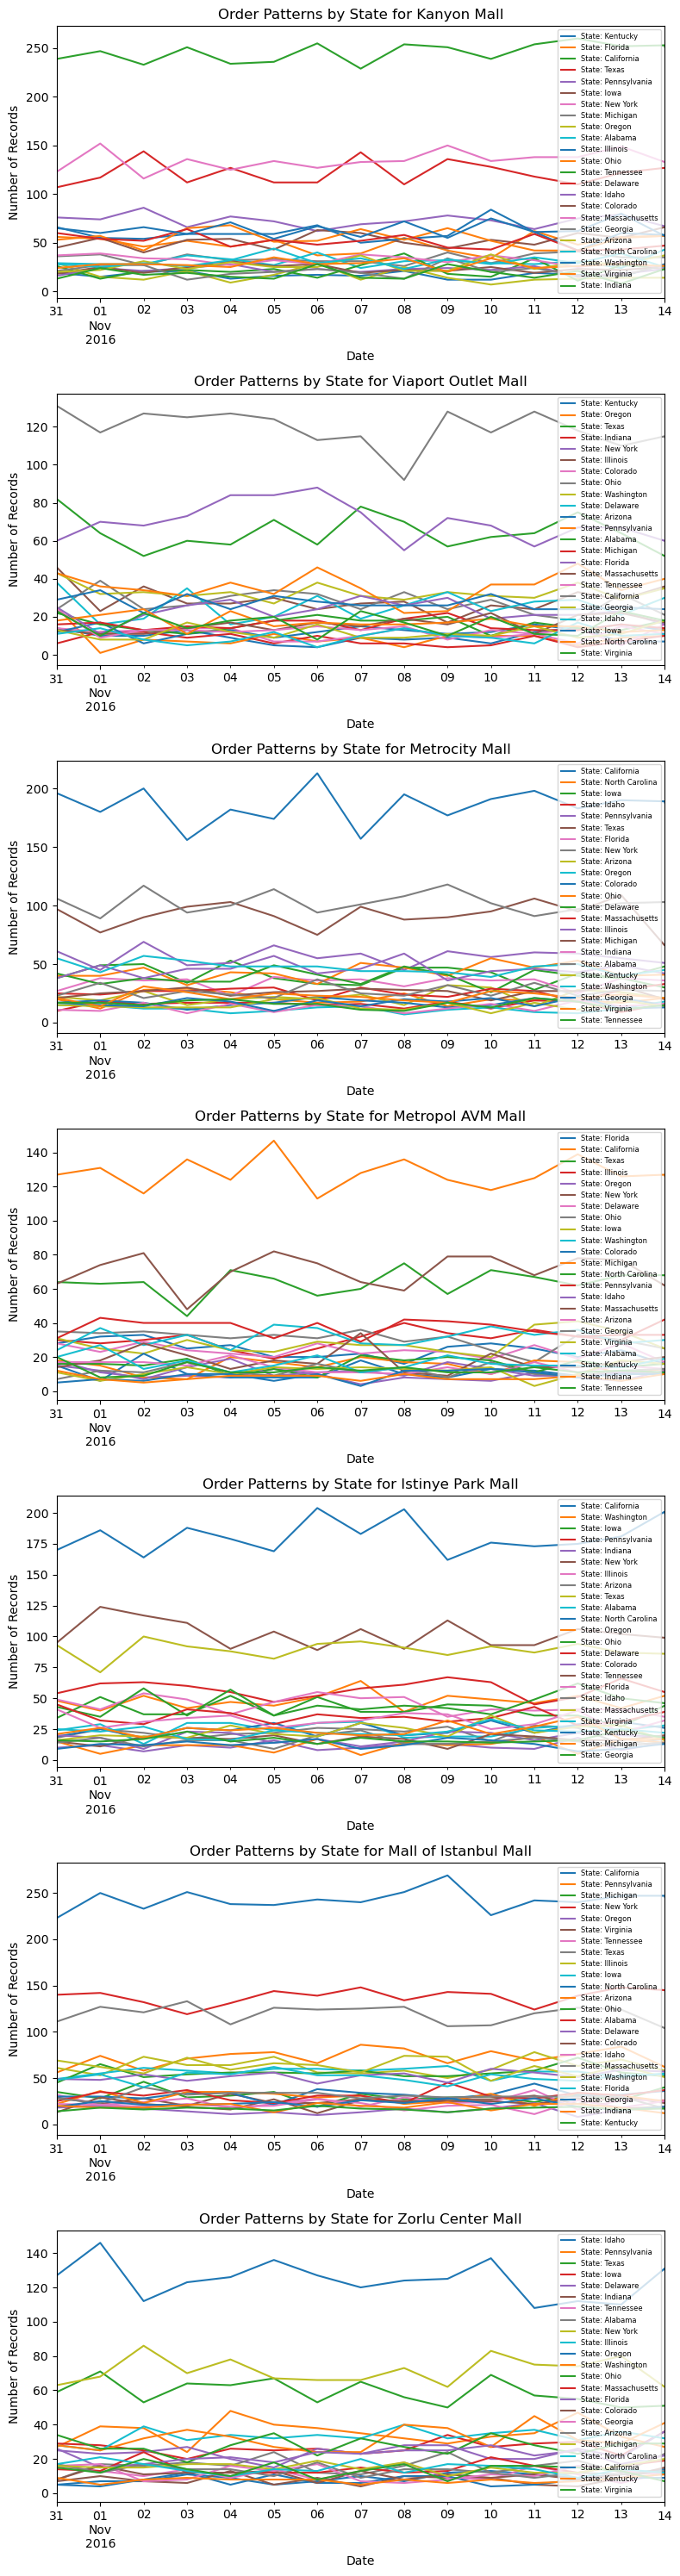

In [105]:
shopping_malls = df['Shopping_Mall'].unique()

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8,30))

for i, shopping_mall in enumerate(shopping_malls):#for each shopping mall
    shopping_mall_subset = df[df['Shopping_Mall'] == shopping_mall]
    
    for state in shopping_mall_subset['State'].unique():#we plot each state
        state_subset = shopping_mall_subset[shopping_mall_subset['State'] == state]
        state_subset.resample('D').size().plot(ax=axes[i], label=f'State: {state}')

    axes[i].set_title(f'Order Patterns by State for {shopping_mall} Mall')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Records')
    axes[i].set_xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
    axes[i].legend(fontsize='6')

plt.tight_layout()
plt.show()

As there are so many states we can't really see the variations of the timeseries that well, but we can notice that California, New York and Texas always have a higher number of orders.

## Part 3

The first subset we use will focus on is our main customer base, which are the states that have the most orders. We want to concentrate on those customers and make buisness decisons to target those people specifically as they bring the most revenue.

First lets create a dataframe only including those states:

In [106]:
top_states = df['State'].value_counts()
top_states = top_states[top_states > 5000].index#we take the states with over 5000 orders

df_top_states = df[df['State'].isin(top_states)]
df_top_states

Invoice_Number Customer_ID  Gender  Age         Category  \
Invoice_Date                                                                   
2016-10-30 09:58:00        I127801     C266599    Male   20         Clothing   
2016-10-30 09:59:00        I121056     C151197  Female   49        Cosmetics   
2016-10-30 09:59:00        I293112     C176086  Female   32         Clothing   
2016-10-30 10:00:00        I293455     C159642    Male   69         Clothing   
2016-10-30 10:00:00        I326945     C283361  Female   60         Clothing   
...                            ...         ...     ...  ...              ...   
2016-11-15 12:40:00        I662891     C180055  Female   50        Cosmetics   
2016-11-15 12:40:00        I161104     C363191  Female   47             Toys   
2016-11-15 12:41:00        I203187     C235554    Male   38  Food & Beverage   
2016-11-15 12:42:00        I332105     C231387  Female   65            Shoes   
2016-11-15 12:42:00        I134399     C953724    Male   65         Clothing   

                     Quantity  Selling_Price_Per_Unit  Cost_Per_Unit  \
Invoice_Date                                                           
2016-10-30 09:58:00         1                  300.08         295.06   
2016-10-30 09:59:00         1                   40.66          35.46   
2016-10-30 09:59:00         2                  600.16         450.12   
2016-10-30 10:00:00         3                  900.24         675.18   
2016-10-30 10:00:00         2                  600.16         450.12   
...                       ...                     ...            ...   
2016-11-15 12:40:00         3                  121.98          91.48   
2016-11-15 12:40:00         5                  179.20         143.36   
2016-11-15 12:41:00         4                   20.92          15.69   
2016-11-15 12:42:00         4                 2400.68        2280.65   
2016-11-15 12:42:00         1                  300.08         225.06   

                    Payment_Method   Region         State     Shopping_Mall  \
Invoice_Date                                                                  
2016-10-30 09:58:00           Cash     West    California         Metrocity   
2016-10-30 09:59:00           Cash     West    California      Istinye Park   
2016-10-30 09:59:00    Credit Card     West    California  Mall of Istanbul   
2016-10-30 10:00:00    Credit Card     West    California         Metrocity   
2016-10-30 10:00:00    Credit Card     West    California            Kanyon   
...                            ...      ...           ...               ...   
2016-11-15 12:40:00           Cash  Central         Texas      Metropol AVM   
2016-11-15 12:40:00    Credit Card  Central         Texas            Kanyon   
2016-11-15 12:41:00           Cash     West    California      Zorlu Center   
2016-11-15 12:42:00    Credit Card     East  Pennsylvania      Metropol AVM   
2016-11-15 12:42:00           Cash     West    California            Kanyon   

                     Revenue  State_Rank  State_Population_2020  \
Invoice_Date                                                      
2016-10-30 09:58:00     5.02           1               39538223   
2016-10-30 09:59:00     5.20           1               39538223   
2016-10-30 09:59:00   300.08           1               39538223   
2016-10-30 10:00:00   675.18           1               39538223   
2016-10-30 10:00:00   300.08           1               39538223   
...                      ...         ...                    ...   
2016-11-15 12:40:00    91.49           2               29145505   
2016-11-15 12:40:00   179.20           2               29145505   
2016-11-15 12:41:00    20.92           1               39538223   
2016-11-15 12:42:00   480.14           5               13002700   
2016-11-15 12:42:00    75.02           1               39538223   

                     State_Percent_Of_Total  
Invoice_Date                                 
2016-10-30 09:58:00                  0.1191  
2016

First we can have a look at the orders for each mall for the top states:

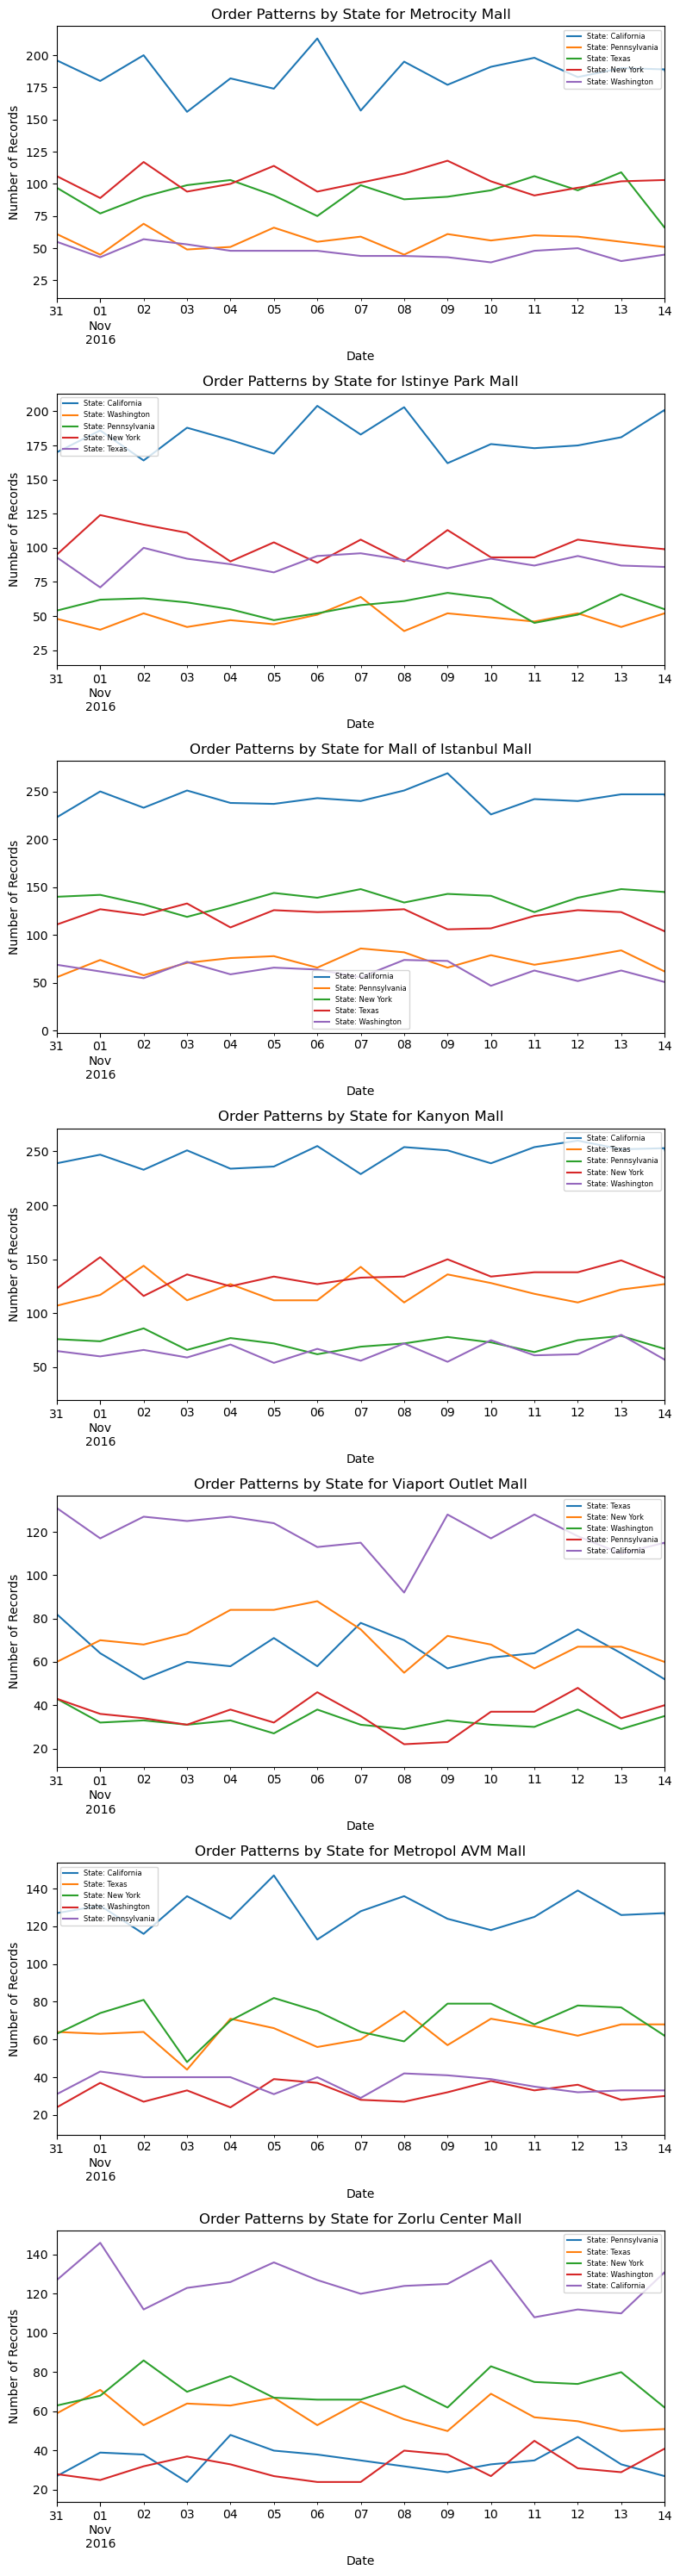

In [107]:
shopping_malls = df_top_states['Shopping_Mall'].unique()

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(8,30))

for i, shopping_mall in enumerate(shopping_malls):#for each shopping mall
    shopping_mall_subset = df_top_states[df_top_states['Shopping_Mall'] == shopping_mall]
    
    for state in shopping_mall_subset['State'].unique():#we plot the top 5 states
        state_subset = shopping_mall_subset[shopping_mall_subset['State'] == state]
        state_subset.resample('D').size().plot(ax=axes[i], label=f'State: {state}')

    axes[i].set_title(f'Order Patterns by State for {shopping_mall} Mall')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Records')
    axes[i].set_xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
    axes[i].legend(fontsize='6')

plt.tight_layout()
plt.show()

For each of the shopping mall chains we clearly the 3 groups with similar number of purchases. We can also notice California seems to have larger fluctuations in terms of orders than the lower end states Pennsylvania and Washington, perhaps due to the fact that there are more customers in that state.<br>
There also doesn't seem to be any repeating paterns or trends in customer orders for the different malls, which could means that the malls provide regional services or promotions to engage customers and don't necessarily all follow the same recommedations.

Now we can look at only the top 3 malls for the top states:

In [108]:
top_malls_per_state = df_top_states.groupby(['State', 'Shopping_Mall']).size().groupby('State', group_keys=False).nlargest(3)
top_malls_per_state

State         Shopping_Mall   
California    Kanyon              3849
              Mall of Istanbul    3746
              Metrocity           2912
New York      Kanyon              2186
              Mall of Istanbul    2174
              Metrocity           1662
Pennsylvania  Kanyon              1173
              Mall of Istanbul    1145
              Istinye Park         919
Texas         Kanyon              1978
              Mall of Istanbul    1874
              Metrocity           1482
Washington    Kanyon              1024
              Mall of Istanbul     965
              Istinye Park         775
dtype: int64

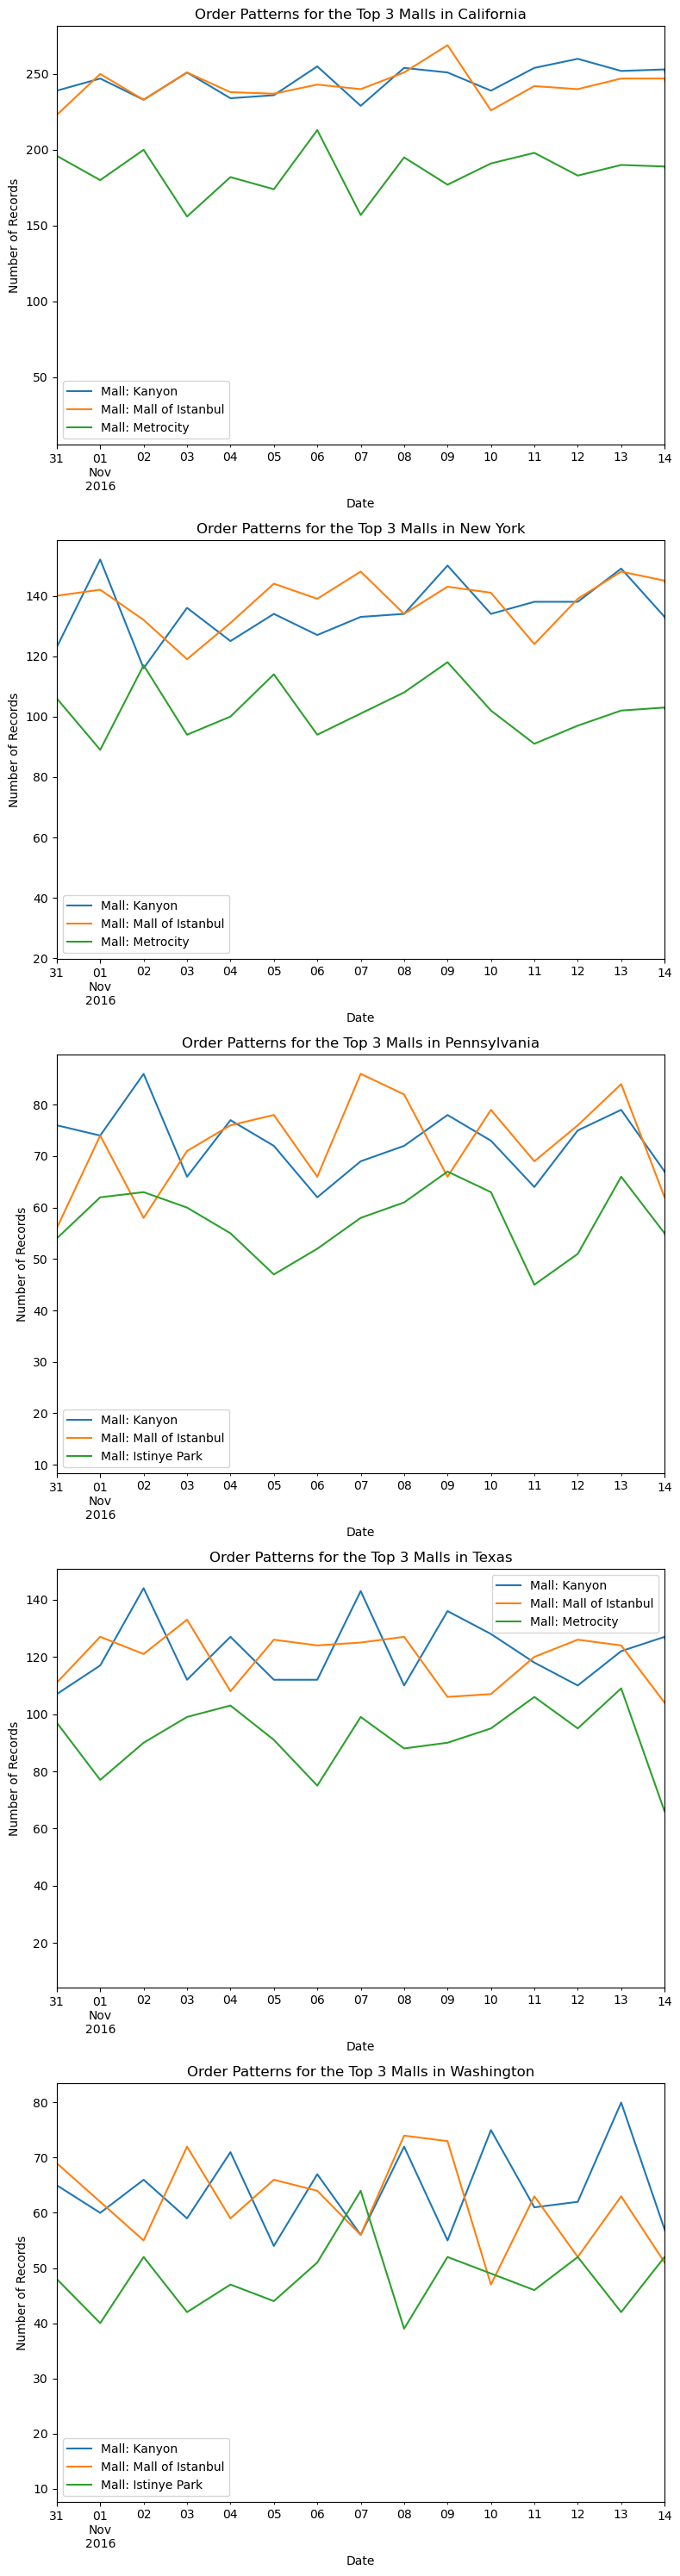

In [109]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 30))

for i, state in enumerate(top_malls_per_state.index.get_level_values('State').unique()):#for each of the top states
    state_subset = df_top_states[df_top_states['State'] == state]

    for mall in top_malls_per_state[state].index.get_level_values('Shopping_Mall'):#we plot the timeseries for the top 3 malls
        mall_subset = state_subset[state_subset['Shopping_Mall'] == mall]
        mall_subset.resample('D').size().plot(ax=axes[i], label=f'Mall: {mall}')

    axes[i].set_title(f'Order Patterns for the Top 3 Malls in {state}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Records')
    axes[i].set_xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
    axes[i].legend()

plt.tight_layout()
plt.show()

We can notice that in each state the fluctuation of number of orders for each different mall don't really coincide, which means that there is no overarching purchasing trend and the variations are more due to the popularity of each mall. We can also see that the top 2 malls are Kanyon and Mall of Istanbul for all the top states, while the 3rd most popular mall varries between Istinye Park and Metrocity.

For each of the top states and their top malls, we can focuss on the higest revenue purchases (above the 3rd quartile) and see which categories those belong to:

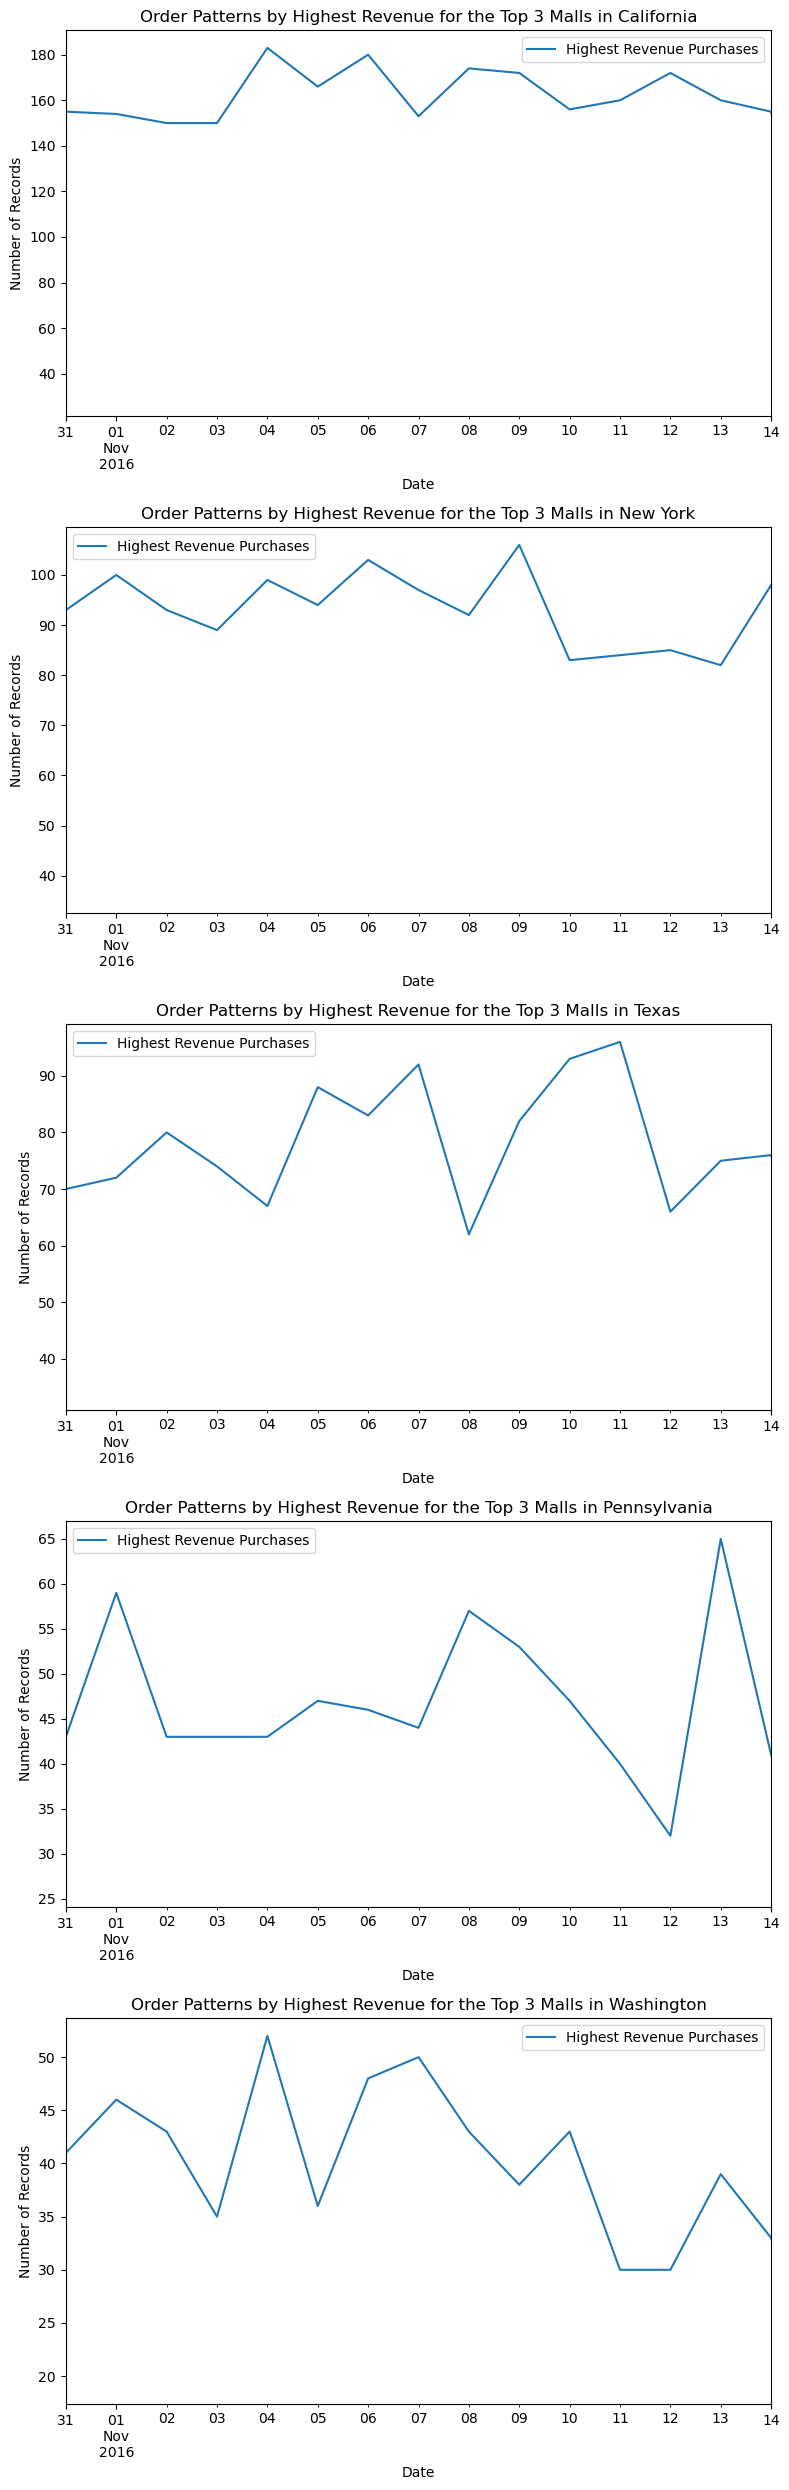

In [110]:
top_states = ['California', 'New York', 'Texas', 'Pennsylvania', 'Washington']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 25))

for i, state in enumerate(top_states):#for each of the top states we will plot a graph
    state_subset = df_top_states[df_top_states['State'] == state]#we get a subset of the top states
    top_malls = state_subset.groupby('Shopping_Mall').size().nlargest(3).index
    top_malls_subset = state_subset[state_subset['Shopping_Mall'].isin(top_malls)]#we get a subset of the top 3 malls for the top states
    highest_revenue_subset = top_malls_subset[top_malls_subset['Revenue'] > top_malls_subset['Revenue'].quantile(0.75)]#we get the orders having a revenue higher than the 3rd quartile
    
    highest_revenue_subset.resample('D').size().plot(ax=axes[i], label=f'Highest Revenue Purchases')#we plot those orders

    axes[i].set_title(f'Order Patterns by Highest Revenue for the Top 3 Malls in {state}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Records')
    axes[i].set_xlim(datetime.strptime('2016-10-31', "%Y-%m-%d"), datetime.strptime('2016-11-14', "%Y-%m-%d"))
    axes[i].legend()

plt.tight_layout()
plt.show()

We notice very large variations in the number of higher revenue purchases for Texas, Pennsylvania and Washington. This makes sense as the amount of higher revenue orders are less likely to occur, given the expensive price. For California and New York the variations are less noticeable, which could be because of the scale and the larger amount of total orders.

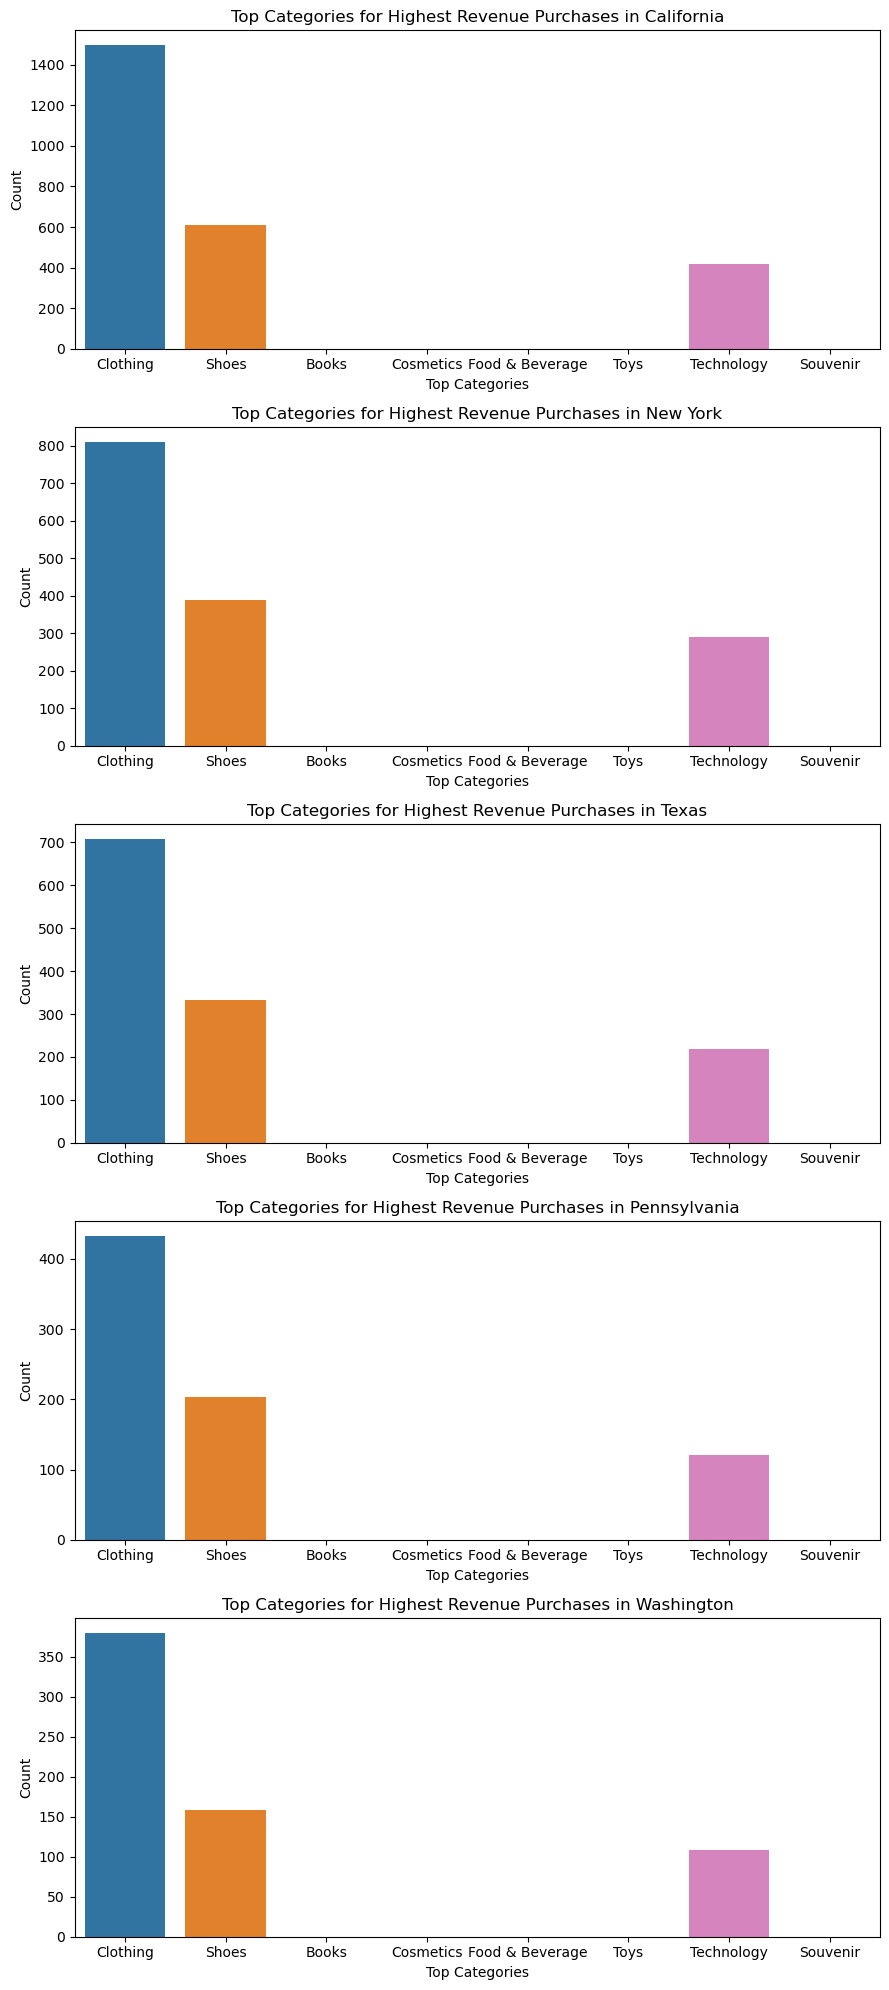

In [111]:
top_states = ['California', 'New York', 'Texas', 'Pennsylvania', 'Washington']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(9, 20))

for i, state in enumerate(top_states):
    state_subset = df_top_states[df_top_states['State'] == state]
    top_malls = state_subset.groupby('Shopping_Mall').size().nlargest(3).index
    top_malls_subset = state_subset[state_subset['Shopping_Mall'].isin(top_malls)]
    highest_revenue_subset = top_malls_subset[top_malls_subset['Revenue'] > top_malls_subset['Revenue'].quantile(0.75)]
    
    top_categories = highest_revenue_subset['Category'].value_counts()#we get the value counts for each category
    sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i])# we get the coresponding barplot
    
    axes[i].set_title(f'Top Categories for Highest Revenue Purchases in {state}')
    axes[i].set_xlabel('Top Categories')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

We can see that the more expensive purchases are mostly from the clothing, shoe and technology categories, which makes sense as technology items are generally of higher value and the clothing items and shoes could be from designer or higher end brands.

Now we will focuss on finding out the characterisitcs of the customers in this subset of higher revenue orders in the top malls for the top states, and see if there are any differences. First we will look at the payment method used:

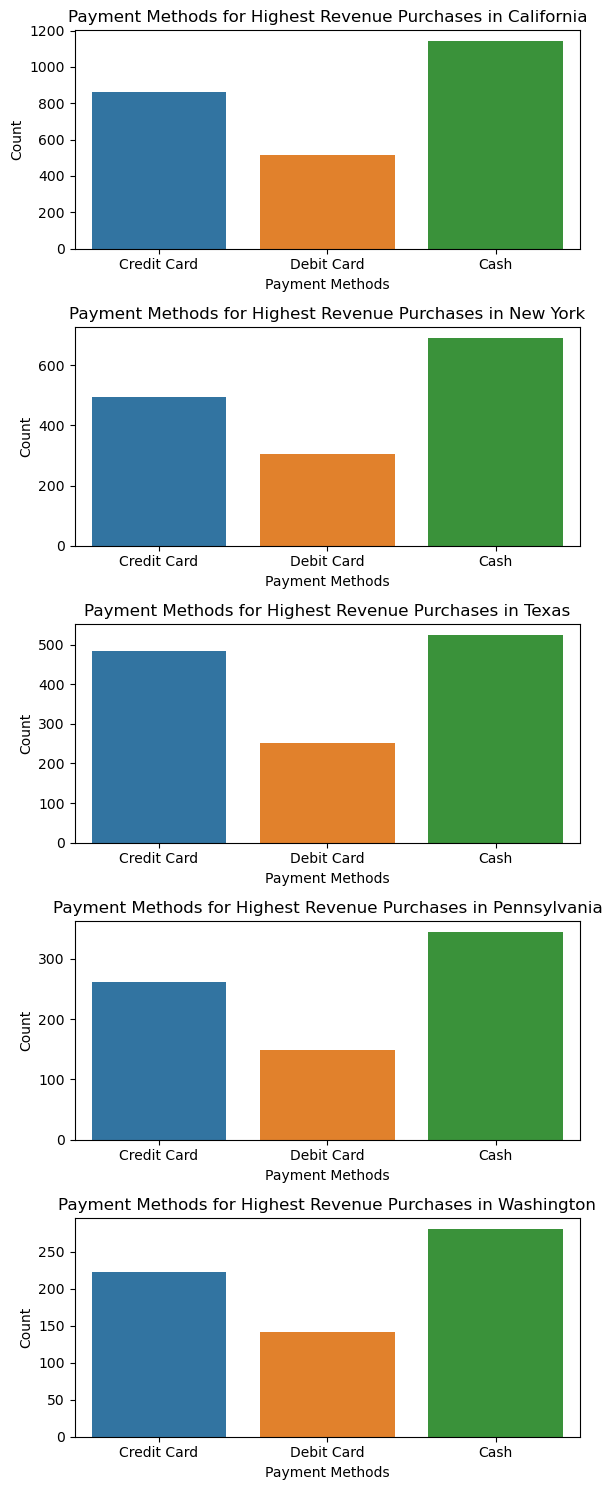

In [112]:
top_states = ['California', 'New York', 'Texas', 'Pennsylvania', 'Washington']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 15))

for i, state in enumerate(top_states):
    state_subset = df_top_states[df_top_states['State'] == state]
    top_malls = state_subset.groupby('Shopping_Mall').size().nlargest(3).index
    top_malls_subset = state_subset[state_subset['Shopping_Mall'].isin(top_malls)]
    highest_revenue_subset = top_malls_subset[top_malls_subset['Revenue'] > top_malls_subset['Revenue'].quantile(0.75)]
    
    top_categories = highest_revenue_subset['Payment_Method'].value_counts()#we get the value counts for each payment method
    sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i])# we get the coresponding barplot
    
    axes[i].set_title(f'Payment Methods for Highest Revenue Purchases in {state}')
    axes[i].set_xlabel('Payment Methods')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

As seen previously the most used payment method is cash, followed by the card payment, which could be because customers prefer paying on delivery and don't trust a retail app with their card payment details.

We can now look at the Gender column for this subset:

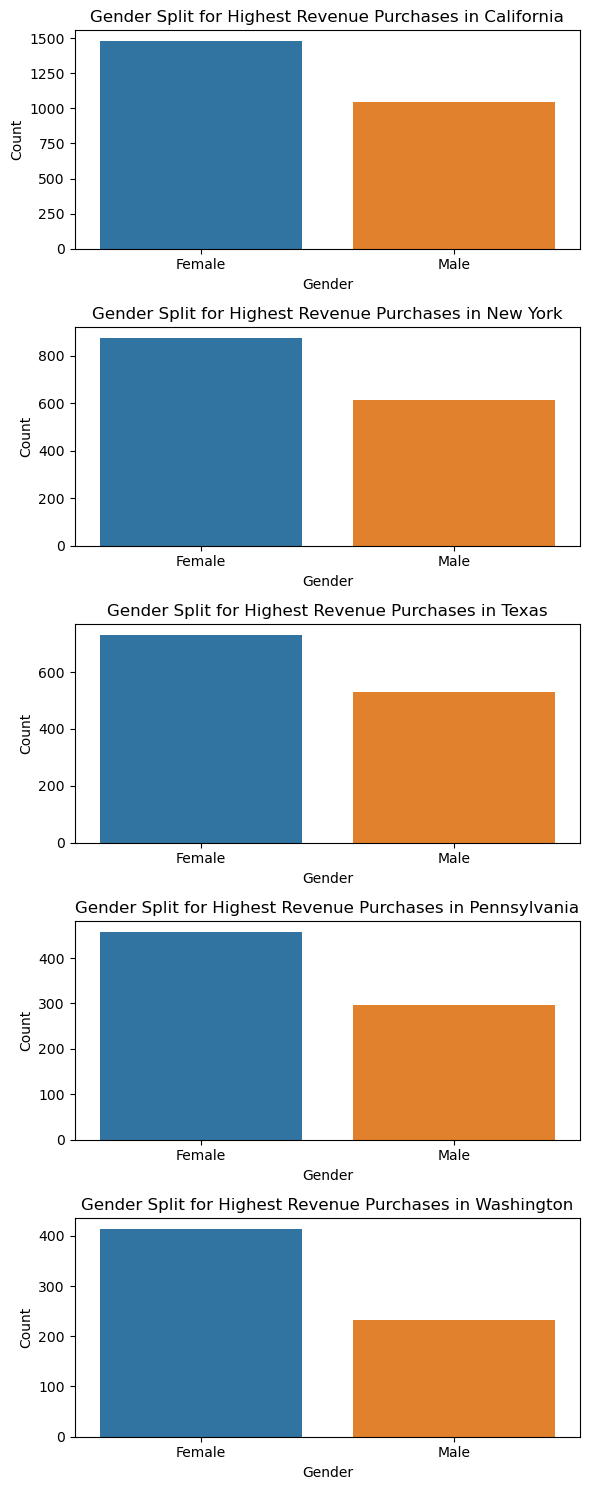

In [113]:
top_states = ['California', 'New York', 'Texas', 'Pennsylvania', 'Washington']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 15))

for i, state in enumerate(top_states):
    state_subset = df_top_states[df_top_states['State'] == state]
    top_malls = state_subset.groupby('Shopping_Mall').size().nlargest(3).index
    top_malls_subset = state_subset[state_subset['Shopping_Mall'].isin(top_malls)]
    highest_revenue_subset = top_malls_subset[top_malls_subset['Revenue'] > top_malls_subset['Revenue'].quantile(0.75)]
    
    top_categories = highest_revenue_subset['Gender'].value_counts()#we get the value counts for gender
    sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i])# we get the coresponding barplot
    
    axes[i].set_title(f'Gender Split for Highest Revenue Purchases in {state}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

The split between female and male customers is fairly similar for each state and representative of the dataset(which has more feale customers).

Now we can have a look at the Age:

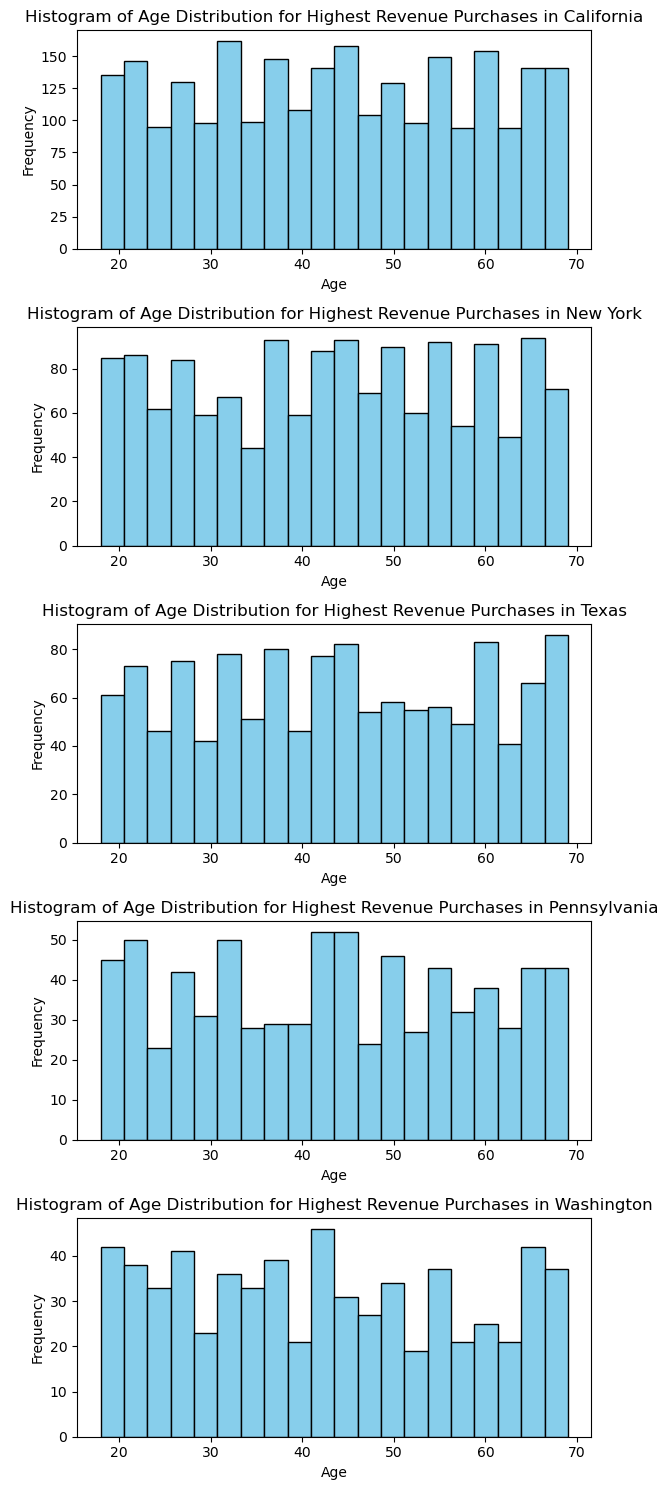

In [114]:
top_states = ['California', 'New York', 'Texas', 'Pennsylvania', 'Washington']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 15))

for i, state in enumerate(top_states):
    state_subset = df_top_states[df_top_states['State'] == state]
    top_malls = state_subset.groupby('Shopping_Mall').size().nlargest(3).index
    top_malls_subset = state_subset[state_subset['Shopping_Mall'].isin(top_malls)]
    highest_revenue_subset = top_malls_subset[top_malls_subset['Revenue'] > top_malls_subset['Revenue'].quantile(0.75)]
    
    axes[i].hist(highest_revenue_subset['Age'], bins=20, color='skyblue', edgecolor='black')#we plot the age distribution
    
    axes[i].set_title(f'Histogram of Age Distribution for Highest Revenue Purchases in {state}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Similarly as for Gender, the Age distribution does not seem to vary much for the higher purchases in the top malls of the top states and is representative of the overall dataset.

So we can conclude that there aren't many differences between the customers in our main customer base and the whole dataset. So we don't need to implement specific policies tailored to just these customers, but instead we can concentrate on all our customers as they have similar characterstics when thinking of new buisness plans and policies.

Now we want to investigate if we have room for improving customer demand in different regions or if we are already engaging with a maximum number of customers.

To do so, we can calculate the percentage of customer orders per state for the population count of that state:

In [115]:
state_counts = df['State'].value_counts()#we get the value counts
state_summary = pd.DataFrame({'State': state_counts.index, 'Count': state_counts.values})
state_summary['Population'] = state_summary['State'].map(df.groupby('State')['State_Population_2020'].max())#we get the state population count for each state

state_summary['Percentage'] = (state_summary['Count'] / state_summary['Population']) * 100#we calculate the percentage

print(state_summary)

             State  Count  Population  Percentage
0       California  19204    39538223    0.048571
1         New York  11171    20201249    0.055299
2            Texas   9856    29145505    0.033817
3     Pennsylvania   5928    13002700    0.045591
4       Washington   5096     7705281    0.066136
5         Illinois   4899    12801989    0.038267
6             Ohio   4618    11799448    0.039137
7             Iowa   4393     3271616    0.134276
8         Delaware   3985      989948    0.402546
9          Florida   3789    21538187    0.017592
10         Alabama   2608     5024279    0.051908
11   Massachusetts   2604     7029917    0.037042
12        Michigan   2581    10077331    0.025612
13  North Carolina   2511    10439388    0.024053
14         Arizona   2272     7151502    0.031770
15        Virginia   2271     8631393    0.026311
16       Tennessee   1840     6910840    0.026625
17        Colorado   1836     5773714    0.031799
18         Georgia   1799    10711908    0.016794


Here we can see that the average percentage per state is around 3%. We can also notice that this percentage is very high in Iowa (13%) and Delaware(40%), so we can invesitigate if these states provide specific policies to increase customer purchases and study those customers in more detail as well as understndng their spending habits.

This also allows us to see which regions should be targeted to increase customer purchases, we could try running regional adds for our app in those areas or offering region specific promotions. The states that could be improved upon the most are the Southern states of Florida and Georgia which have less than 2% of customers

Next we can use the synthetic data to see the influence of Price variations and Quantity variations on the revenue:

First we need to regenerate the synthetic data following a different distribution for the columns of interest, creating more samples to compare with the original data: 

In [116]:
np.random.seed(1) #we set the random seed to be able to generate the same results when we run the notebook

def generate_data_different_distribution(column, mean_factor, std_factor):
    standard_normal_samples = np.random.normal(size=99000)#we randomly generate values following the standard normal distribution, we want a similarly sized dataset to be able to compare easierly
    rows = mean_factor*column.mean() + std_factor*column.std() * standard_normal_samples#we transform the values to follow the new normal distribution    
    rows = abs(rows)#we want to make sure all our values are positive
    return rows

synthetic_df1 = pd.DataFrame()
synthetic_df1['Quantity'] = generate_data_different_distribution(df['Quantity'], 1, 1)#first we only try varying the cost
synthetic_df1['Cost_Per_Unit'] = generate_data_different_distribution(df['Cost_Per_Unit'], 2, 1)# which we double

coef = df['Selling_Price_Per_Unit']/df['Cost_Per_Unit']
synthetic_df1['Selling_Price_Per_Unit'] = synthetic_df1['Cost_Per_Unit'] * coef.mean()
synthetic_df1['Revenue'] = synthetic_df1['Selling_Price_Per_Unit'] * synthetic_df1['Quantity'] - synthetic_df1['Cost_Per_Unit']* synthetic_df1['Quantity']
synthetic_df1['Quantity'] = round(synthetic_df1['Quantity']).astype('int64')

synthetic_df1.head()

Quantity  Cost_Per_Unit  Selling_Price_Per_Unit      Revenue
0         5    1721.092845             2203.028389  2555.828519
1         2    1420.187132             1817.863910   850.488896
2         2    1112.924507             1424.562475   703.346862
3         1    1414.796076             1810.963266   588.672327
4         4     883.170192             1130.473007  1045.888388

We use the seaborn library's kernel density estimate plot to show a smoothed version of the histogram:

C:\Users\jess6\AppData\Local\Temp\ipykernel_11932\2255512731.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Revenue'], label='Original Data', shade=True)
C:\Users\jess6\AppData\Local\Temp\ipykernel_11932\2255512731.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df1['Revenue'], label='Synthetic Data', shade=True)


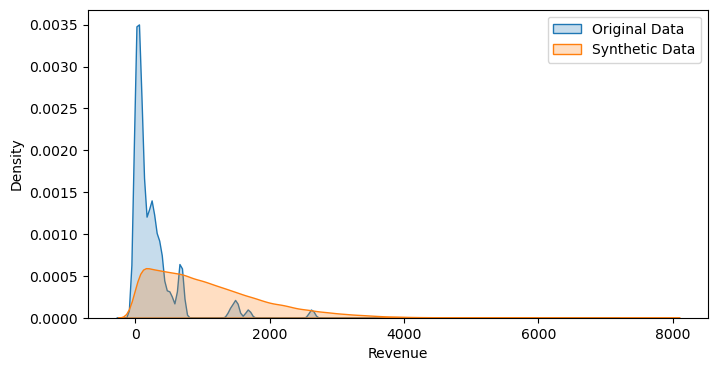

In [117]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Revenue'], label='Original Data', shade=True)
sns.kdeplot(synthetic_df1['Revenue'], label='Synthetic Data', shade=True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

When doubling the mean and keeping the standard deviation the same for cost per unit column, we obtain a more normal distribution by design (as we generated the values from the standard normal and then applied the mean and std) thought it is slightly skewed to the left.

We can use a different representation to show the difference between the distributions:

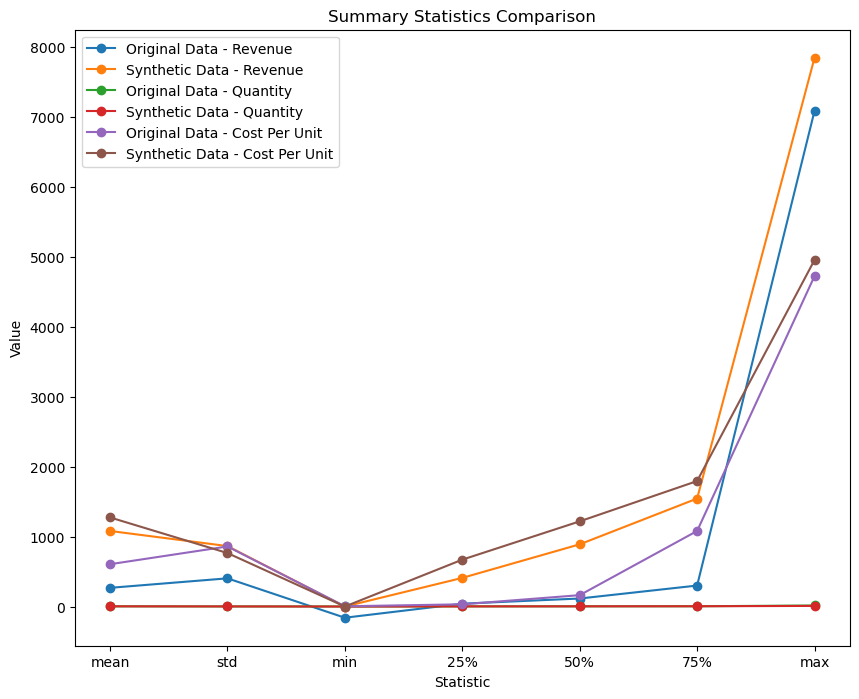

In [118]:
original = df.describe(percentiles=[.25, .5, .75]).drop('count')
synthetic = synthetic_df1.describe(percentiles=[.25, .5, .75]).drop('count')

plt.figure(figsize=(10, 8))

plt.plot(original.index, original['Revenue'], marker='o', label='Original Data - Revenue')
plt.plot(synthetic.index, synthetic['Revenue'], marker='o', label='Synthetic Data - Revenue')
plt.plot(original.index, original['Quantity'], marker='o', label='Original Data - Quantity')
plt.plot(synthetic.index, synthetic['Quantity'], marker='o', label='Synthetic Data - Quantity')
plt.plot(original.index, original['Cost_Per_Unit'], marker='o', label='Original Data - Cost Per Unit')
plt.plot(synthetic.index, synthetic['Cost_Per_Unit'], marker='o', label='Synthetic Data - Cost Per Unit')

plt.xlabel('Statistic')
plt.ylabel('Value')
plt.title('Summary Statistics Comparison')
plt.legend()
plt.show()

When we represent all the distributions in one graph we can't see as clearly, and as the distributions are of different scale we can't see the variations for quantity. We can use subplots to show each of them:

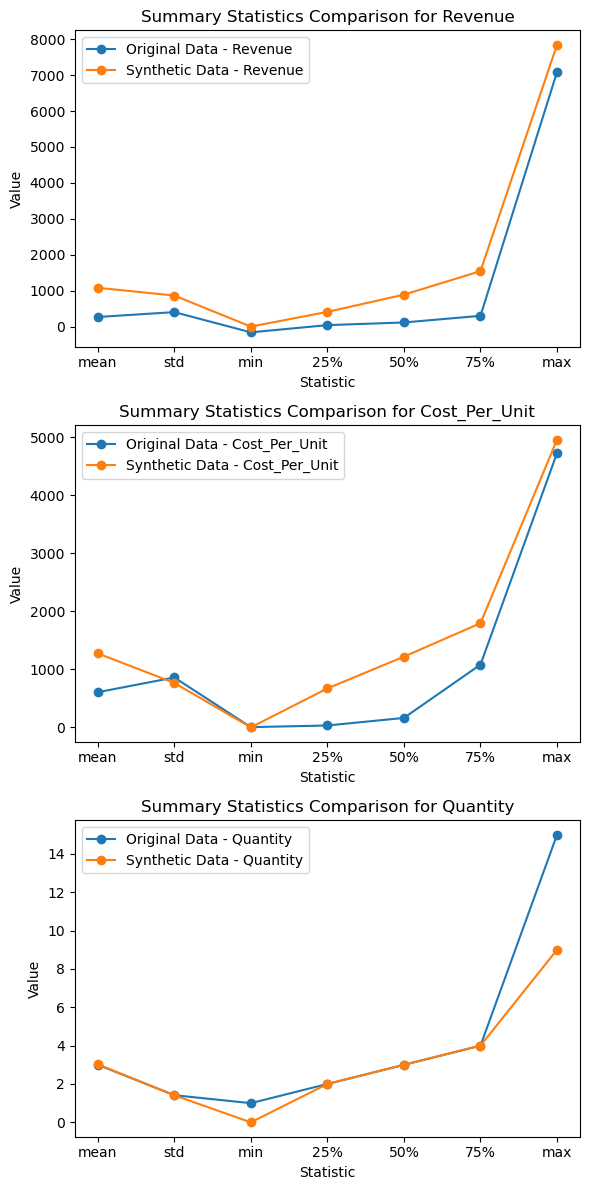

In [119]:
columns = ['Revenue', 'Cost_Per_Unit', 'Quantity']
original = df.describe(percentiles=[.25, .5, .75]).drop('count')
synthetic = synthetic_df1.describe(percentiles=[.25, .5, .75]).drop('count')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))

for i, column in enumerate(columns):
    axes[i].plot(original.index, original[column], marker='o', label=f'Original Data - {column}')
    axes[i].plot(synthetic.index, synthetic[column], marker='o', label=f'Synthetic Data - {column}')
    axes[i].set_title(f'Summary Statistics Comparison for {column}')
    axes[i].set_xlabel('Statistic')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()

As expected given that the cost per unit distribution has doubled, the revenue is increased.

We can add even more variation by increasing the factors:

In [120]:
np.random.seed(1) #we set the random seed to be able to generate the same results when we run the notebook

def generate_data_different_distribution(column, mean_factor, std_factor):
    standard_normal_samples = np.random.normal(size=99000)#we randomly generate values following the standard normal distribution, we want a similarly sized dataset to be able to compare easierly
    rows = mean_factor*column.mean() + std_factor*column.std() * standard_normal_samples#we transform the values to follow the new normal distribution    
    rows = abs(rows)#we want to make sure all our values are positive
    return rows

synthetic_df2 = pd.DataFrame()
synthetic_df2['Quantity'] = generate_data_different_distribution(df['Quantity'], 2, 1)#we also double the quantity column mean
synthetic_df2['Cost_Per_Unit'] = generate_data_different_distribution(df['Cost_Per_Unit'], 2, 1)

coef = df['Selling_Price_Per_Unit']/df['Cost_Per_Unit']
synthetic_df2['Selling_Price_Per_Unit'] = synthetic_df2['Cost_Per_Unit'] * coef.mean()
synthetic_df2['Revenue'] = synthetic_df2['Selling_Price_Per_Unit'] * synthetic_df2['Quantity'] - synthetic_df2['Cost_Per_Unit']* synthetic_df2['Quantity']
synthetic_df2['Quantity'] = round(synthetic_df2['Quantity']).astype('int64')

synthetic_df2.head()

Quantity  Cost_Per_Unit  Selling_Price_Per_Unit      Revenue
0         8    1721.092845             2203.028389  4003.767244
1         5    1420.187132             1817.863910  2045.278561
2         5    1112.924507             1424.562475  1639.639460
3         4    1414.796076             1810.963266  1778.926549
4         7     883.170192             1130.473007  1788.890908

C:\Users\jess6\AppData\Local\Temp\ipykernel_11932\2375710597.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Revenue'], label='Original Data', shade=True)
C:\Users\jess6\AppData\Local\Temp\ipykernel_11932\2375710597.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(synthetic_df2['Revenue'], label='Synthetic Data', shade=True)


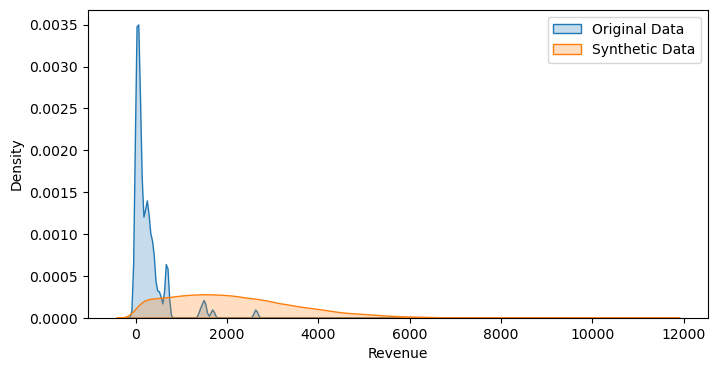

In [121]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Revenue'], label='Original Data', shade=True)
sns.kdeplot(synthetic_df2['Revenue'], label='Synthetic Data', shade=True)
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

When looking at the smoothed histogram, we notice a distribution closer to the normal distribution.

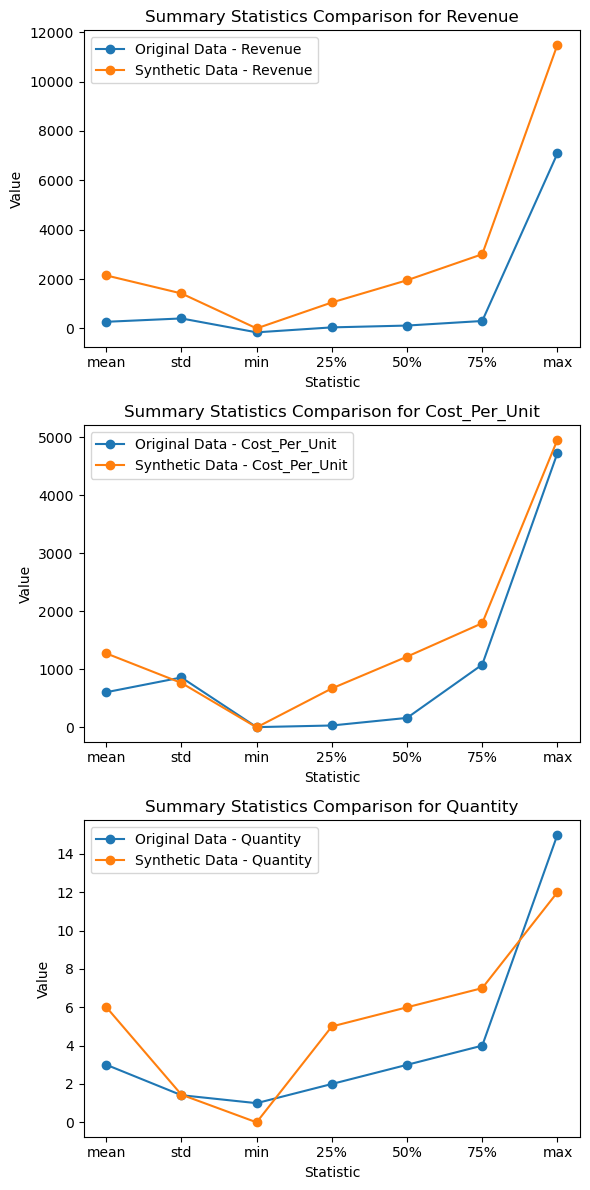

In [122]:
columns = ['Revenue', 'Cost_Per_Unit', 'Quantity']
original = df.describe(percentiles=[.25, .5, .75]).drop('count')
synthetic = synthetic_df2.describe(percentiles=[.25, .5, .75]).drop('count')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))

for i, column in enumerate(columns):
    axes[i].plot(original.index, original[column], marker='o', label=f'Original Data - {column}')
    axes[i].plot(synthetic.index, synthetic[column], marker='o', label=f'Synthetic Data - {column}')
    axes[i].set_title(f'Summary Statistics Comparison for {column}')
    axes[i].set_xlabel('Statistic')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()

As we can see when increasing both the quantity and the cost per unit the revenue is doubly increased. 
If the company is able to achieve such profits in terms of revenue, this would allow to fund further buisness ventures and expand marketing campains to attract more customers.